# Class Project I

## Team members : 
* Sarah Antille
* Zeineb Sahnoun
* Lilia Ellouz

# Relevant Imports

In [1]:
# Useful starting lines
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from proj1_helpers import *
from implementations import *
from helpers import *
import datetime
np.set_printoptions(suppress=True) #prevents printing arrays with the scientific notation (ex: e+002)

# I. Exploratory data analysis

### Some details to get started (from Aicrowd instructions):
* All variables are floating point, except PRI_jet_num which is integer
* Variables prefixed with PRI (for PRImitives) are “raw” quantities about the bunch collision as measured by the detector.
* Variables prefixed with DER (for DERived) are quantities computed from the primitive features, which were selected by the physicists of ATLAS.
* It can happen that for some entries some variables are meaningless or cannot be computed; in this case, their value is −999.0, which is outside the normal range of all variables.

In [2]:
#loading the dataset
path_dataset = "data/train.csv"
#in the y (labels) vector, 1 is for s and -1 is for b
y, input_data, ids = load_csv_data(path_dataset)

In [3]:
#according to train.csv file
col_names = ['DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'DER_lep_eta_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt']

dict_indexToName = dict(zip(range(len(col_names)),col_names))
print("Number of features: ", len(col_names))

Number of features:  30


### Here is a description of all our features ([Source](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf))

| Feature name                | Variable Type | Description 
|-----------------------------|---------------|--------------------------------------------------------
| Prediction                  | Binary        | 1 = Signal; -1 = background
| DER_mass_MMC                | Continuous    | The estimated mass mH of the Higgs boson candidate.
| DER_mass_transverse_met_lep | Continuous    | The transverse mass between the missing transverse energy and the lepton.
| DER_mass_vis                | Continuous    | The invariant mass of the hadronic tau and the lepton.
| DER_pt_h                    | Continuous    | The modulus of the vector sum of the transverse momentum.
| DER_deltaeta_jet_jet        | Continuous    | The absolute value of the pseudorapidity separation between the two jets.
| DER_mass_jet_jet            | Continuous    | The invariant mass of the two jets.
| DER_prodeta_jet_jet         | Continuous    | The product of the pseudorapidities of the two jets.
| DER_deltar_tau_lep          | Continuous    | The R separation between the hadronic tau and the lepton.
| DER_pt_tot                  | Continuous    | The modulus of the vector sum of the missing transverse and the transverse momenta.
| DER_sum_pt                  | Continuous    | The sum of the moduli of the transverse momenta of the hadronic tau, the lepton, the leading jet and the subleading jet and the other jets.
| DER_pt_ratio_lep_tau        | Continuous    | The ratio of the transverse momenta of the lepton and the hadronic tau.
| DER_met_phi_centralit       | Continuous    | The centrality of the azimuthal angle of the missing transverse energy vector.
| DER_lep_eta_centrality      | Continuous    | The centrality of the pseudorapidity of the lepton w.r.t. the two jets.
| PRI_tau_pt                  | Continuous    | The transverse momentum 􏰌of the hadronic tau.
| PRI_tau_eta                 | Continuous    | The pseudorapidity η of the hadronic tau.
| PRI_tau_phi                 | Continuous    | The azimuth angle φ of the hadronic tau.
| PRI_lep_pt                  | Continuous    | The transverse momentum of the lepton (electron or muon).
| PRI_lep_eta                 | Continuous    | The pseudorapidity η of the lepton. 
| PRI_lep_phi                 | Continuous    | The azimuth angle φ of the lepton.
| PRI_met                     | Continuous    | The missing transverse energy
| PRI_met_phi                 | Continuous    | The azimuth angle φ of the missing transverse energy.
| PRI_met_sumet               | Continuous    | The total transverse energy in the detector.
| PRI_jet_num                 | Integer       | The number of jets (values of 0, 1, 2 or 3 possible, larger values have been capped at 3).
| PRI_jet_leading_pt          | Continuous    | The transverse momentum of the leading jet.
| PRI_jet_leading_eta         | Continuous    | The pseudorapidity η of the leading jet.
| PRI_jet_leading_phi         | Continuous    | The azimuth angle φ of the leading jet.
| PRI_jet_subleading_pt       | Continuous    | The transverse momentum of the leading jet.
| PRI_jet_subleading_eta      | Continuous    | The pseudorapidity η of the subleading jet.
| PRI_jet_subleading_phi      | Continuous    | The azimuth angle φ of the subleading jet.
| PRI_jet_all_pt              | Continuous    | The scalar sum of the transverse momentum of all the jets of the events.

In [4]:
#250000 data points, 30 features
print("Shape of the dataframe: ",input_data.shape)

Shape of the dataframe:  (250000, 30)


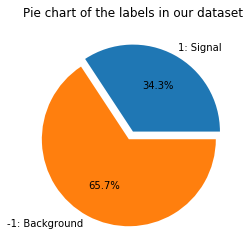

In [5]:
#Let's see if our dataset is well balanced
pie_chart(y)

/Users/macbook/Desktop/ML/ML_2019/project1/helpers.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 5))


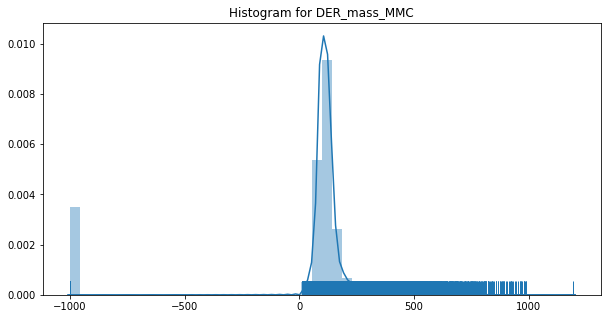

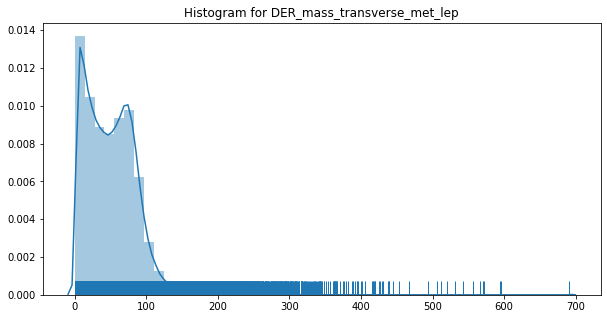

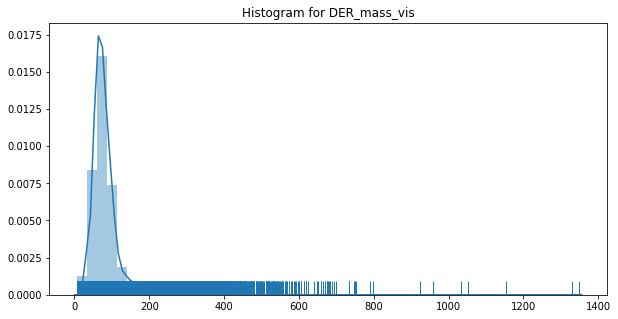

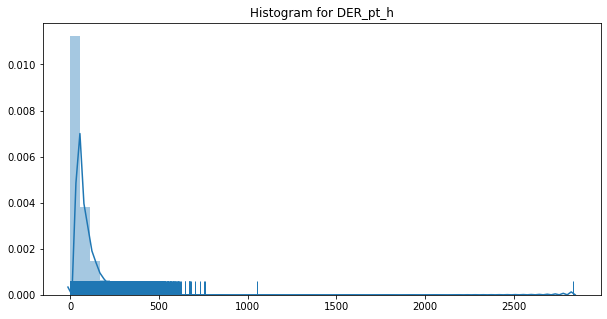

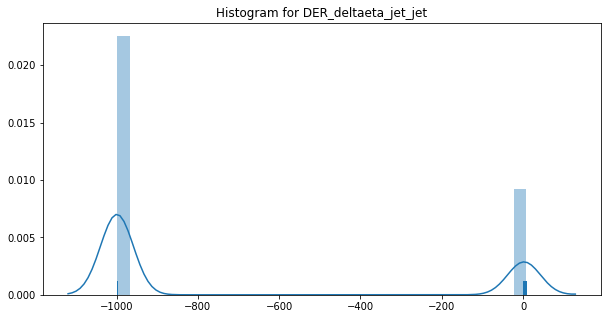

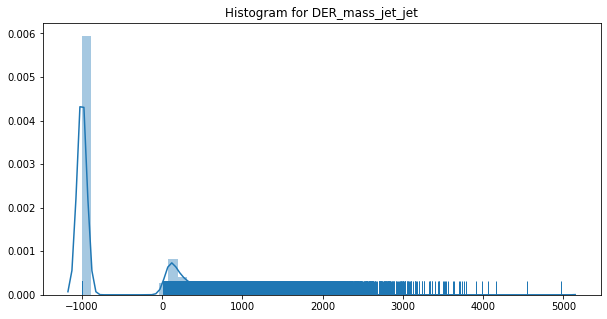

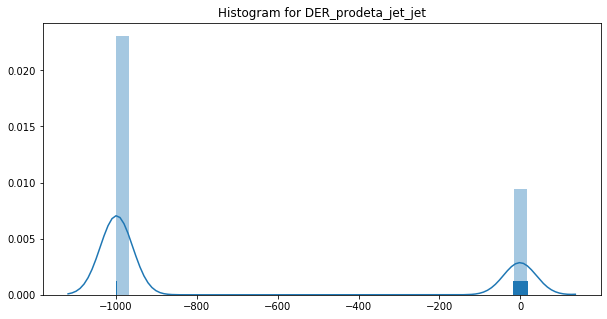

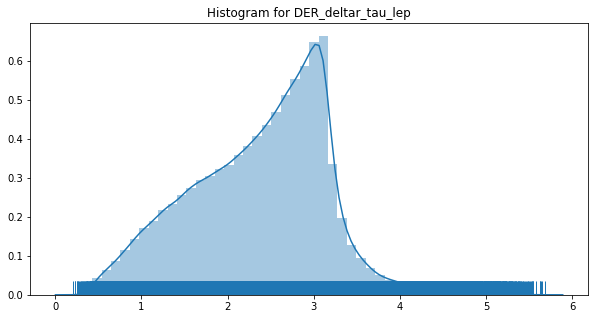

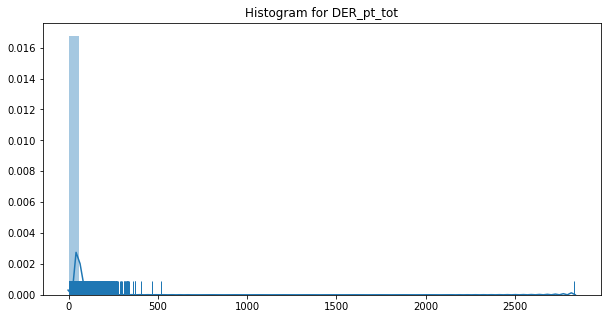

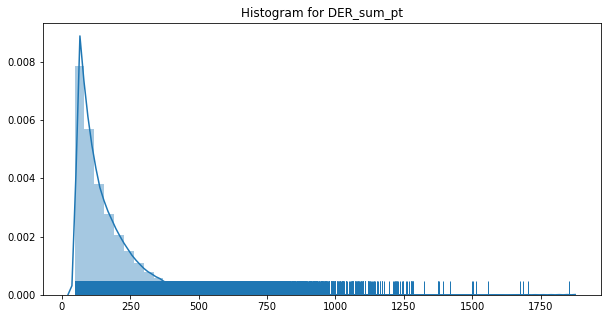

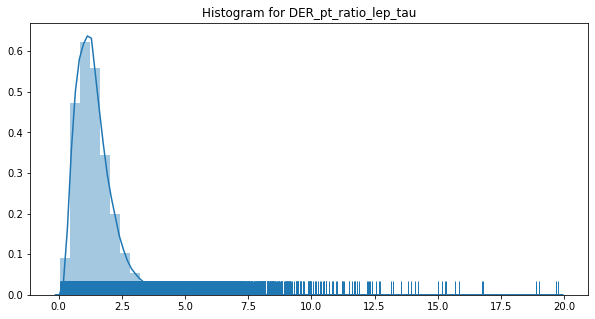

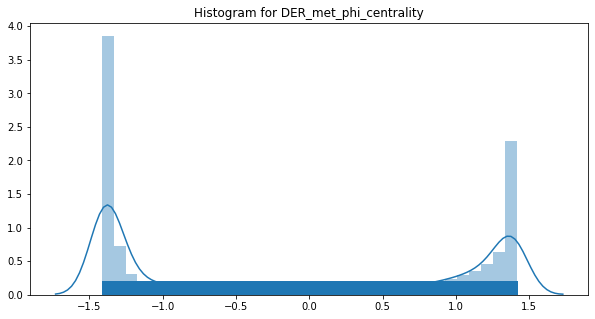

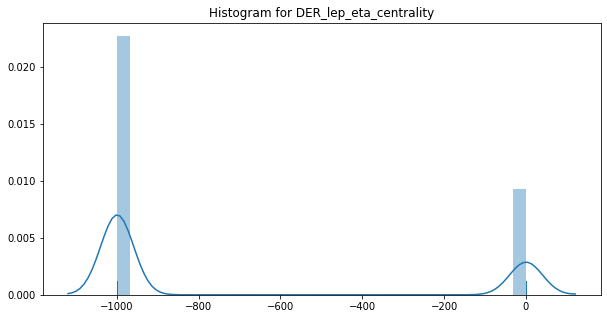

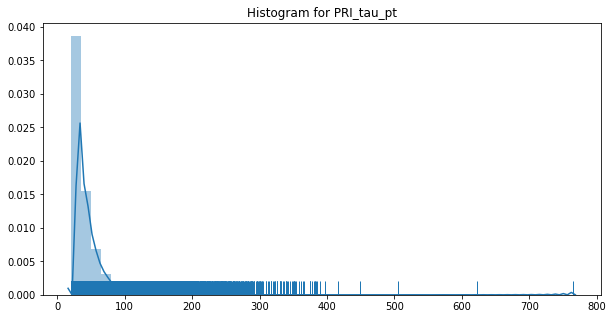

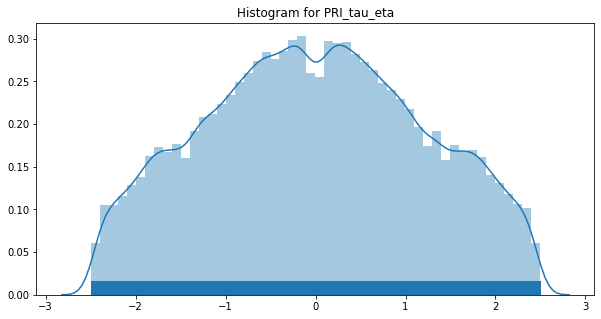

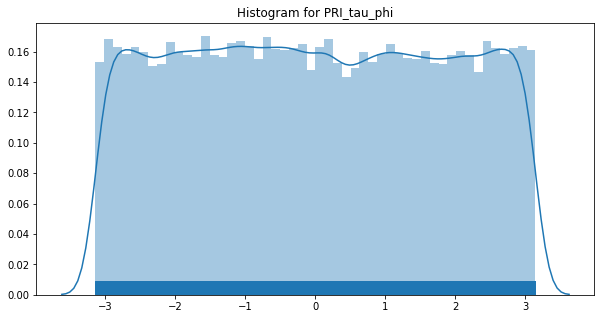

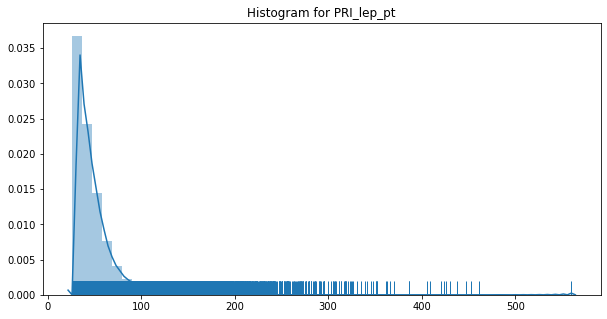

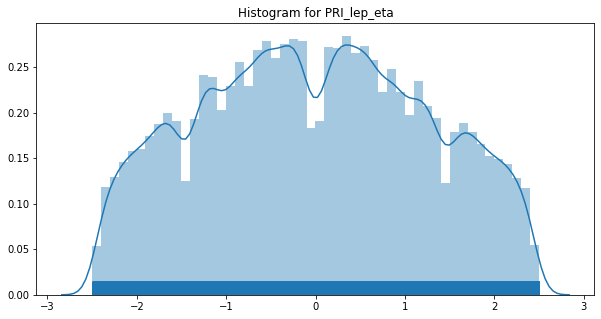

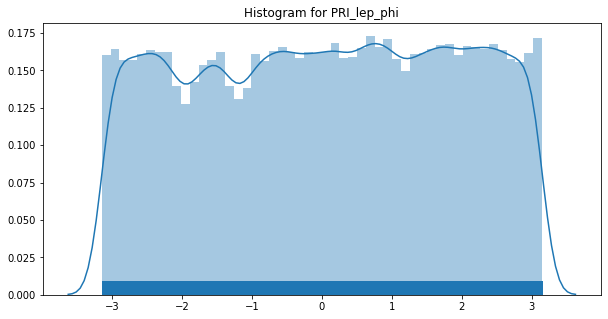

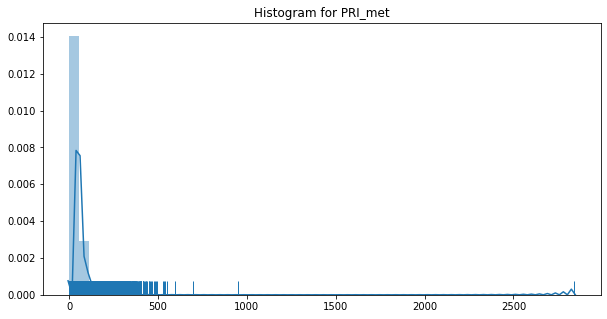

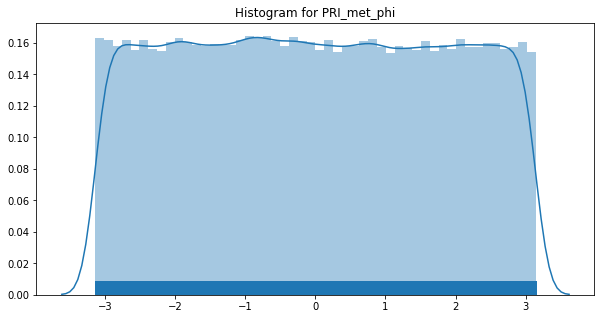

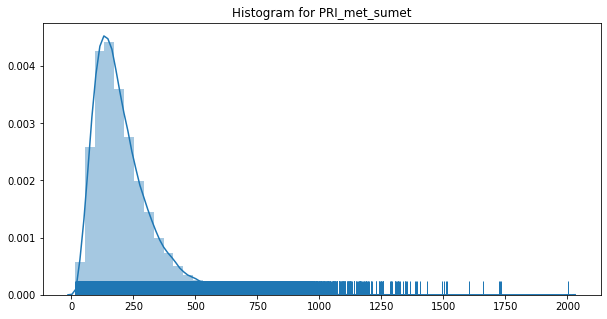

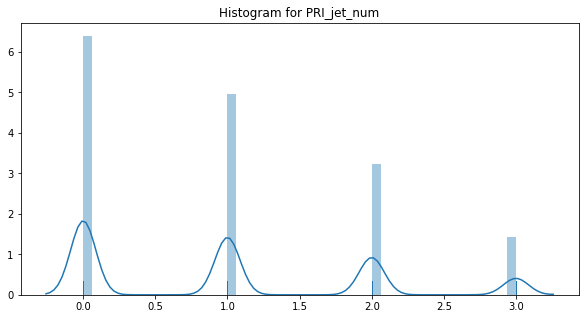

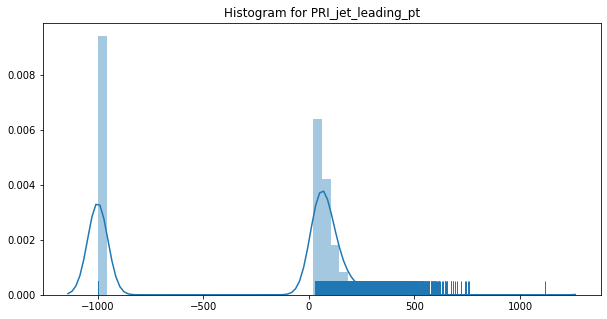

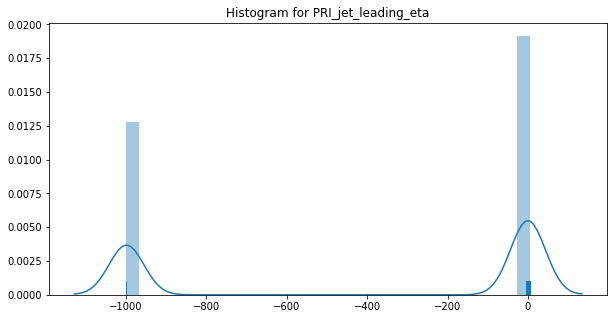

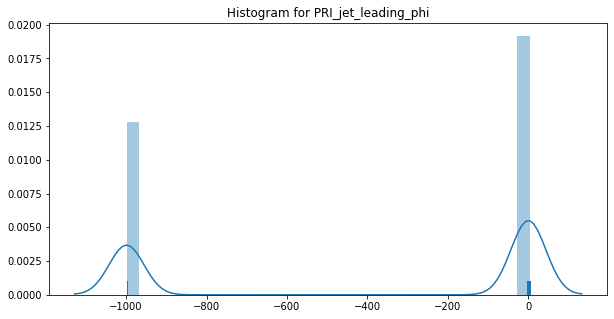

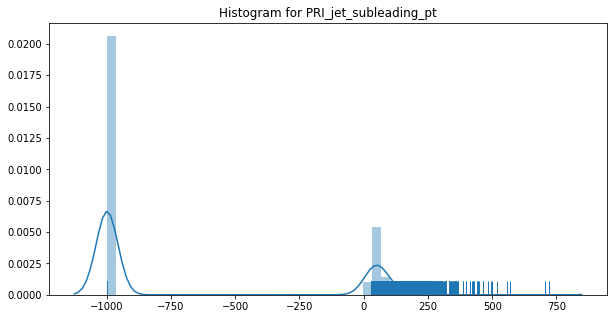

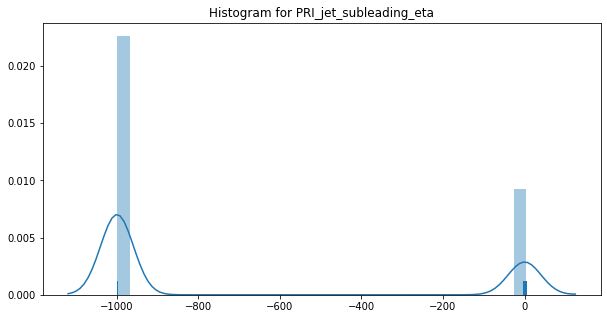

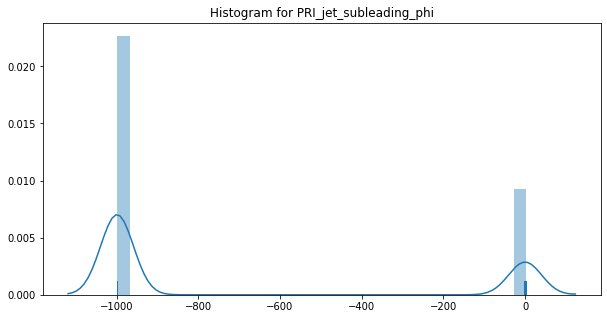

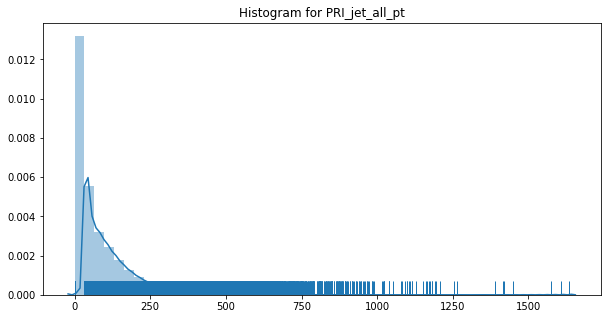

In [7]:
#let's explore the distribution of our features
for i in range(30):
    histogram(i, input_data, dict_indexToName)

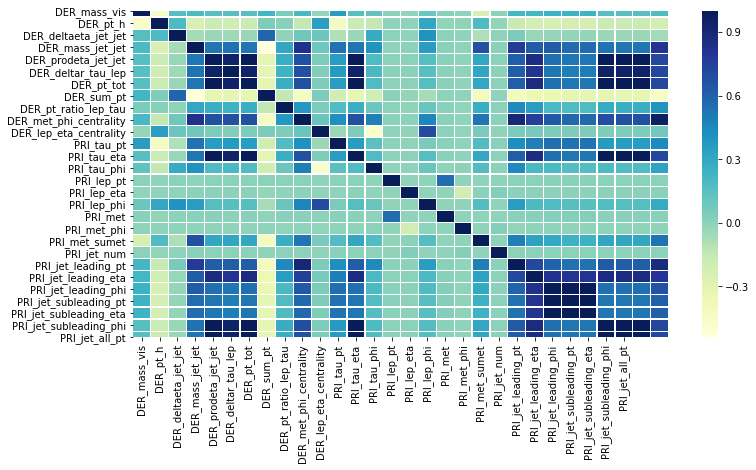

In [14]:
correlation_matrix(input_data, col_names[2:])

## Conclusions

**Data types**
* We see that all of our features are continuous except PRI_jet_num which is integer.

**Number of features**
* We have 30 features in total.

**Missing values**
* 23 out of 30 of our features have significant proportions of missing values (value -999).

**Data samples**
* We have 250'000 data samples in our training data set. We might want to separate those into Training Set and Validation Set later on.

**Relationships between features**
* We have high correlation between a lot of our features as some of them are derived from the others. We will try to clean that in the next section.

**The dataset is not perfectly balanced**
* We will see later on if we might want to use oversampling or undersampling to have better accuracy.


# II. Feature processing

## 1. Feature selection


After examining the correlation matrix and reading about the diferent features, we notice that some columns entirely depend on the value of PRI_jet_num. We hence decide to divide the dataset to three subsets depending on the values of PRI_jet_num and hence train three models.

### Info about the features that have a high undefined fraction:
- DER mass MMC (may be undefined if the topology of the event is too far from the expected topology)
- DER deltaeta jet jet (undefined if PRI jet num ≤ 1).
- DER mass jet jet (undefined if PRI jet num ≤ 1).
- DER prodeta jet jet (undefined if PRI jet num ≤ 1).
- DER lep eta centrality (undefined if PRI jet num ≤ 1)
- PRI jet leading pt (undefined if PRI jet num = 0).
- PRI jet leading eta (undefined if PRI jet num = 0).
- PRI jet leading phi  (undefined if PRI jet num = 0)
- PRI jet subleading pt  (undefined if PRI jet num ≤ 1)
- PRI jet subleading eta  (undefined if PRI jet num ≤ 1).
- PRI jet subleading phi  (undefined if PRI jet num ≤ 1).

([Source](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf))

So the majority of these undefined features seem to depend on the feature PRI_jet_num, which may take the values 0, 1, 2, or 3. 

In [6]:
#1st partition consisting of elements having PRI_jet_num=0
ids_1 = np.argwhere(input_data[:,22]==0)[:,0]
keys_1, y_1, X_1 = ids[ids_1], y[ids_1], input_data[ids_1]
#2nd partition consisting of elements having PRI_jet_num=1
ids_2 = np.argwhere(input_data[:,22]==1)[:,0]
keys_2, y_2, X_2 = ids[ids_2], y[ids_2], input_data[ids_2]
#3rd partition consisting of elements having PRI_jet_num>1
ids_3 = np.argwhere(input_data[:,22]>1)[:,0]
keys_3, y_3, X_3 = ids[ids_3], y[ids_3], input_data[ids_3]

In [7]:
#y_1,X_1,keys_1 = downsample(y_1,X_1,keys_1)
#y_2,X_2,keys_2 = downsample(y_2,X_2,keys_2)
#y_3,X_3,keys_3 = downsample(y_3,X_3,keys_3)

In [8]:
#pie_chart(y_1)
#pie_chart(y_2)
#pie_chart(y_3)

* We plot the Distribution of the features for each subset to decide on which columns are irrelevant

/Users/macbook/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/macbook/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/macbook/Desktop/ML/ML_2019/project1/helpers.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 5))


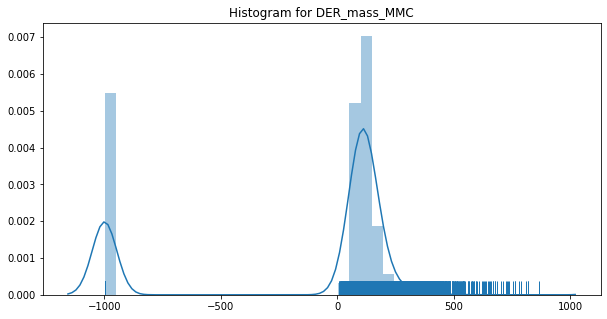

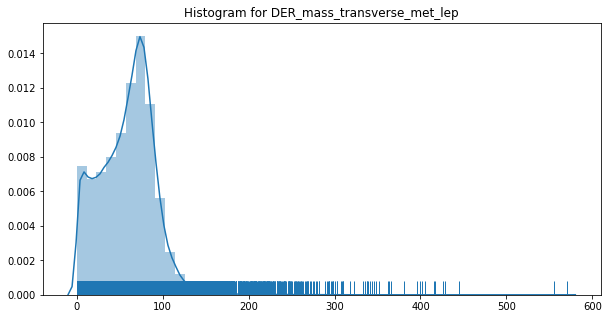

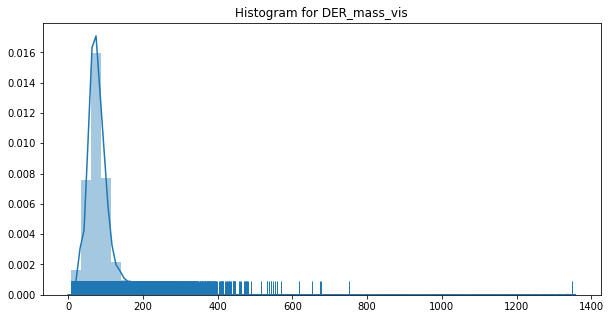

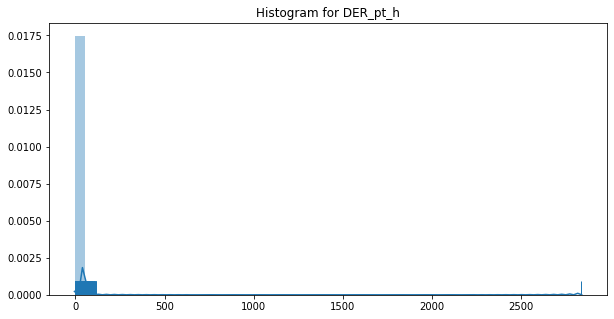

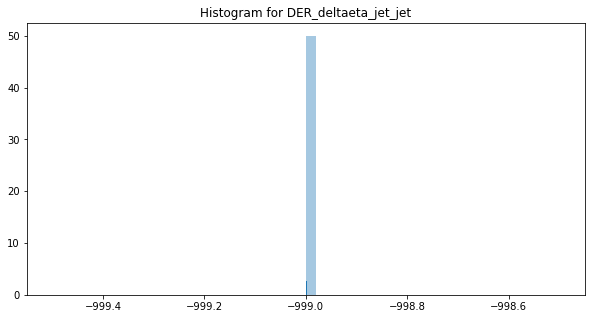

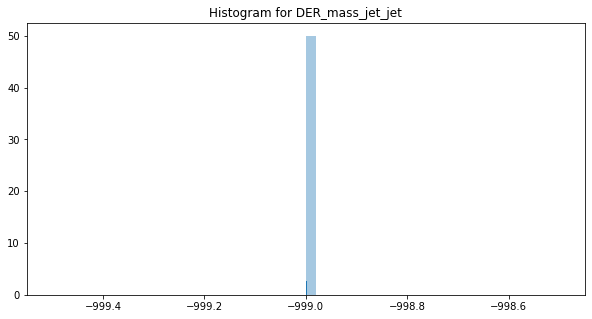

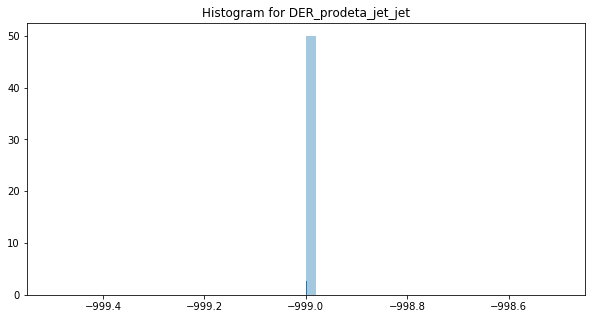

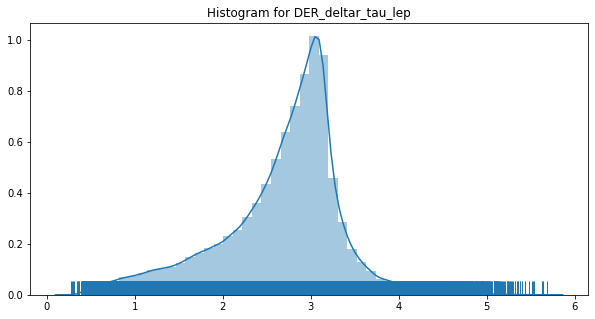

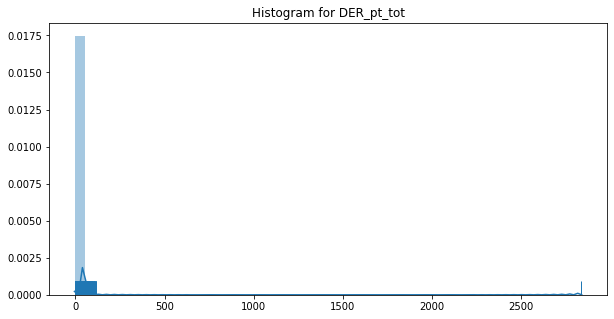

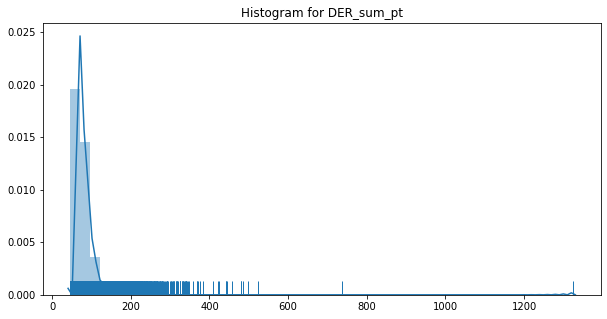

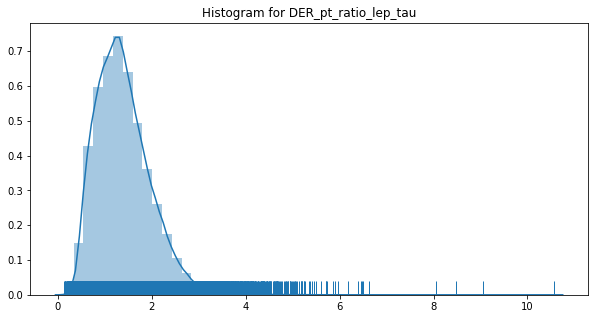

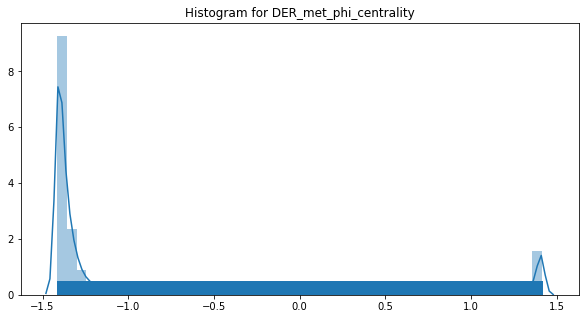

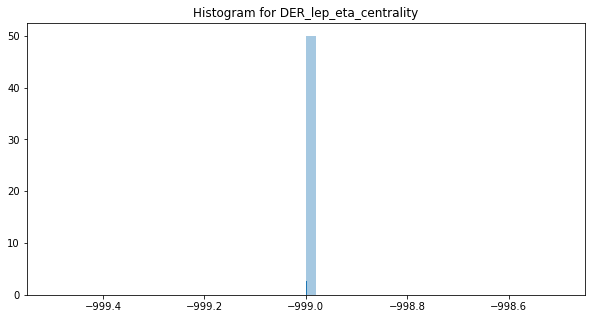

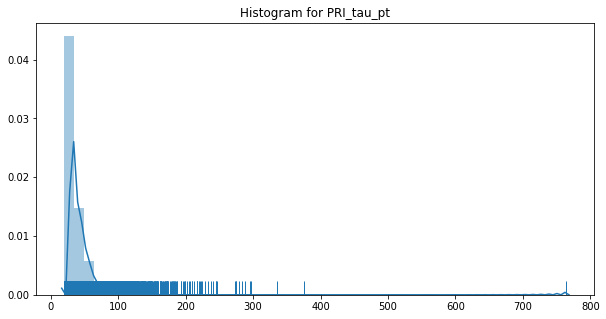

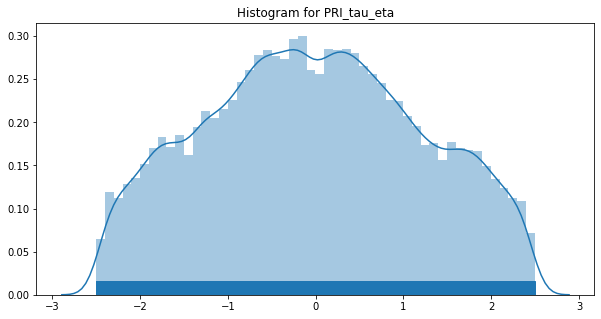

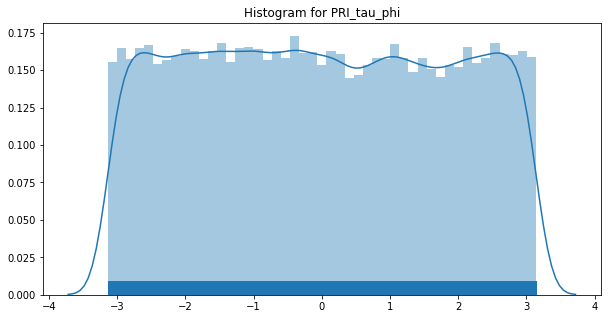

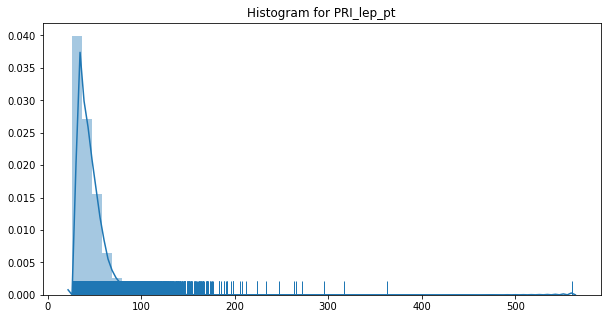

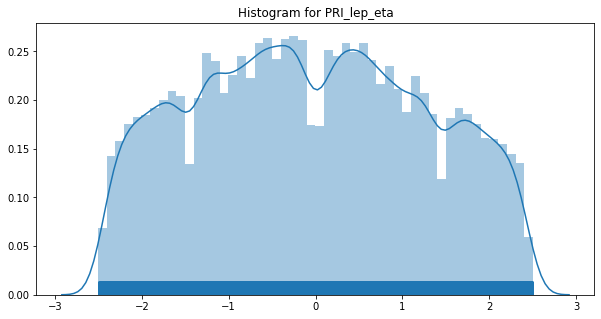

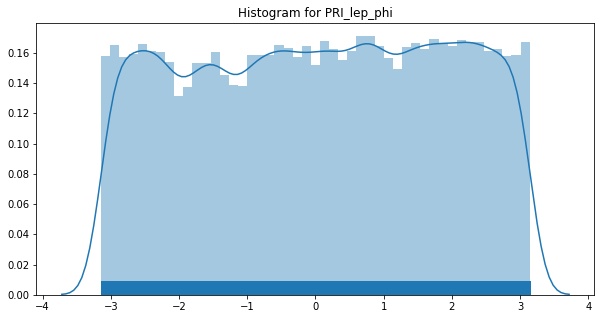

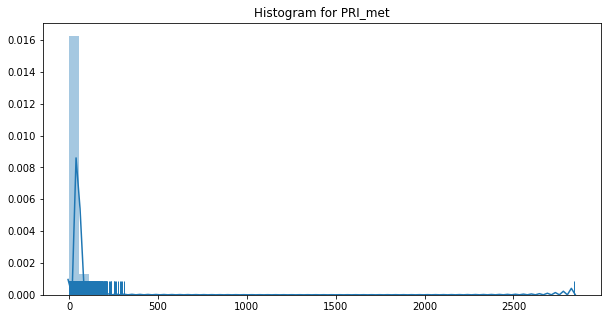

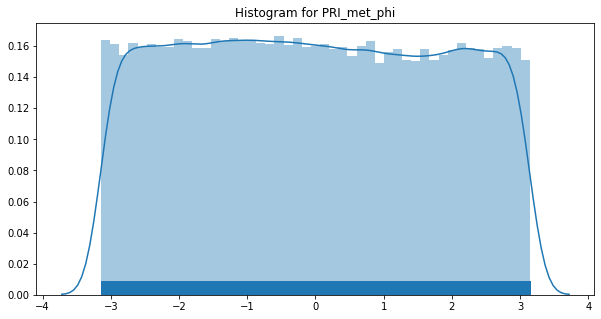

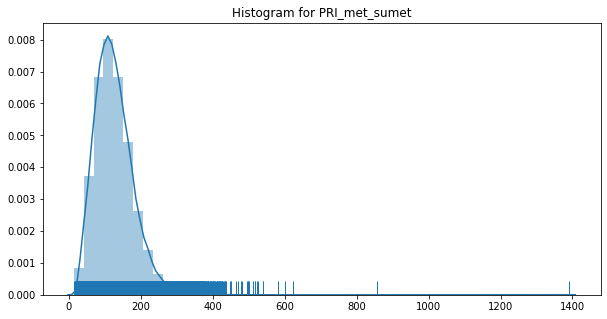

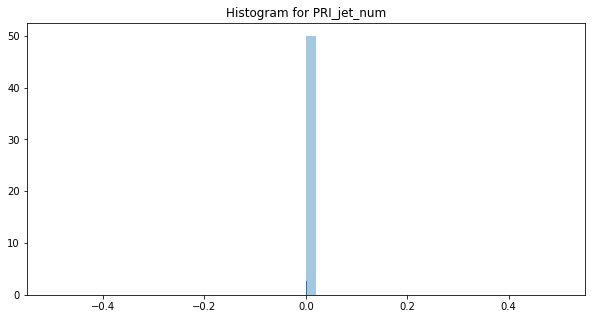

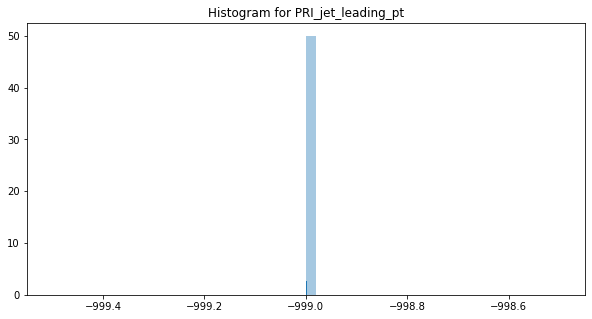

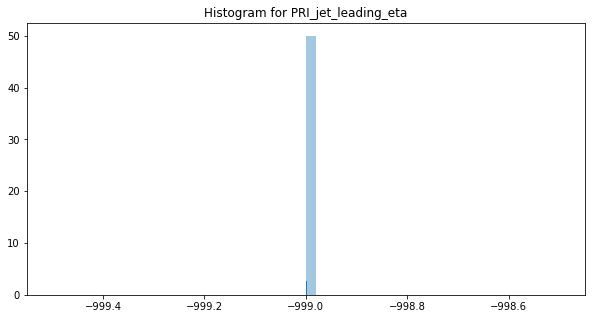

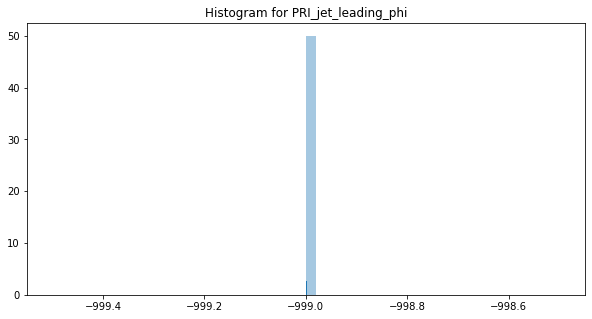

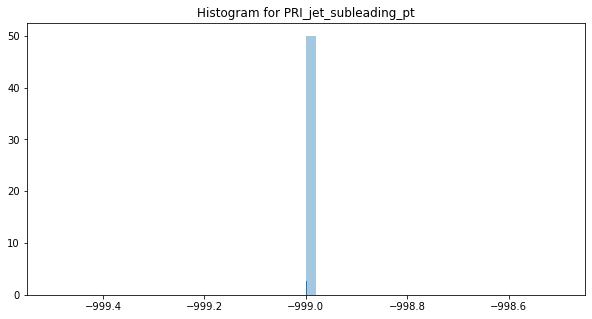

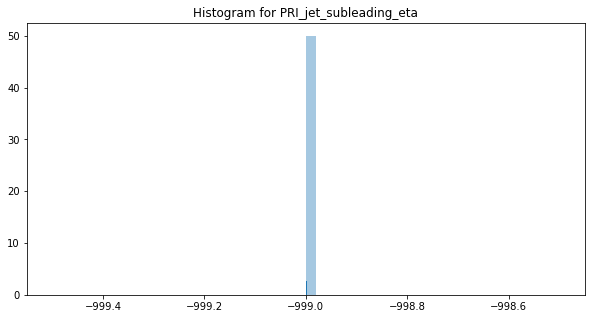

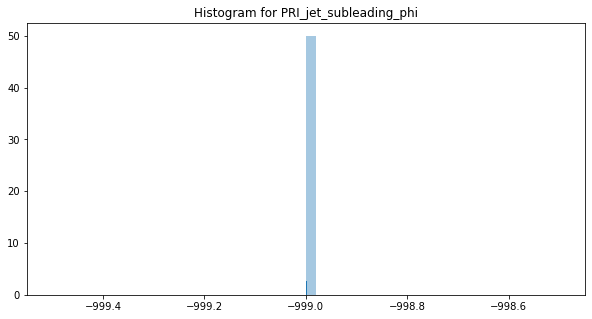

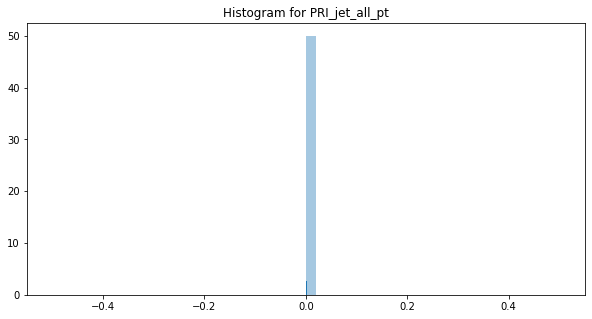

In [16]:
#let's plot the distribution of features of X_1
for i in range(30):
    histogram(i, X_1, dict_indexToName)

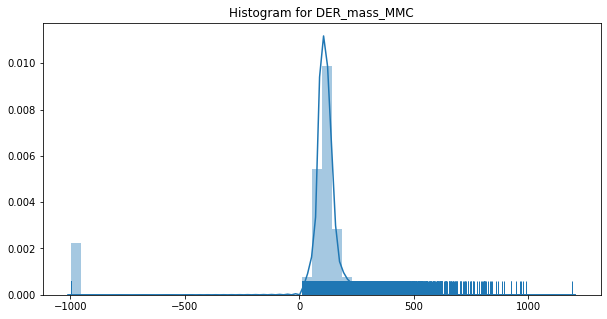

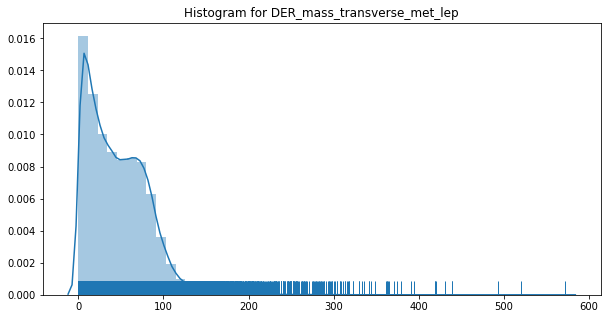

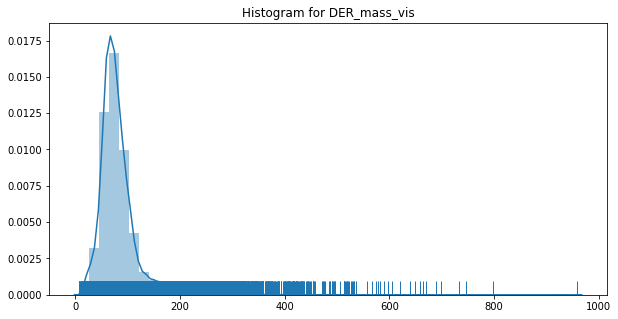

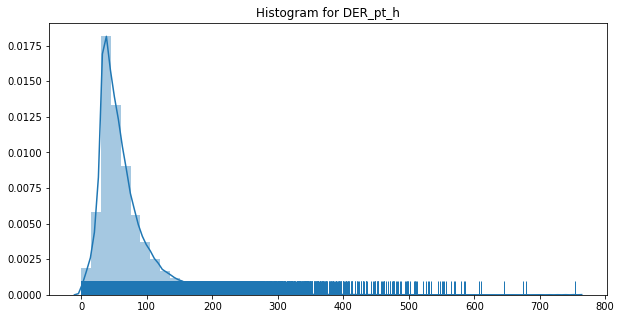

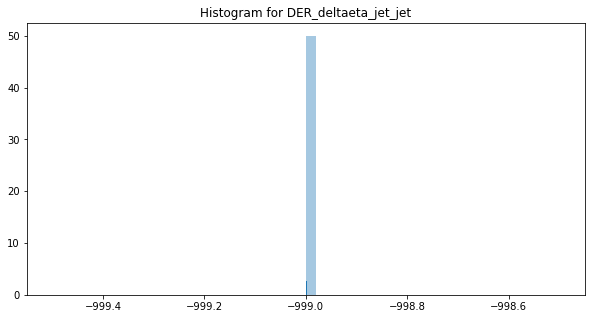

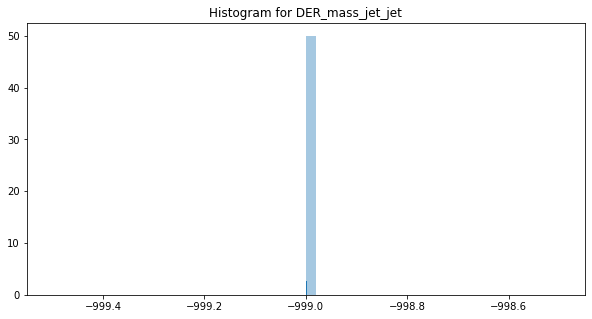

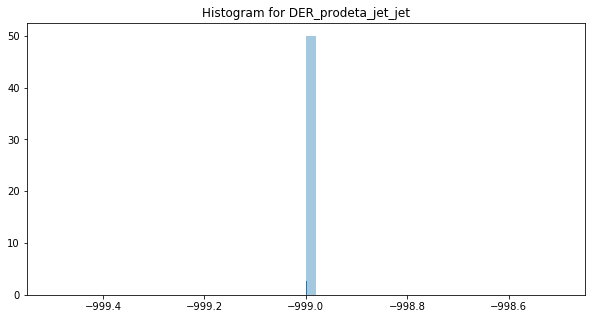

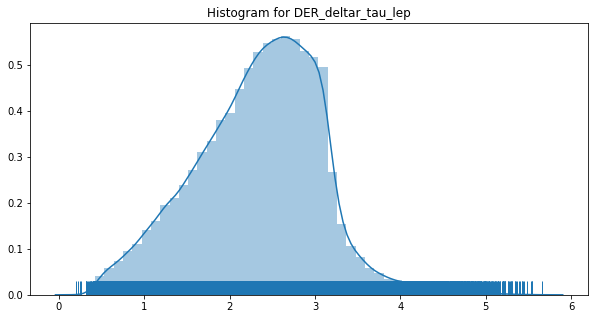

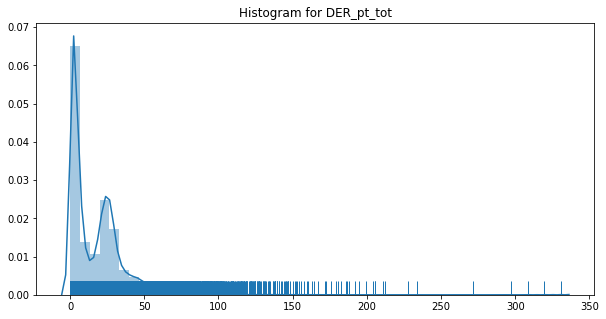

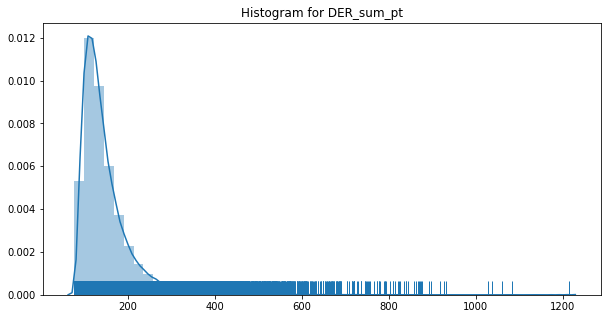

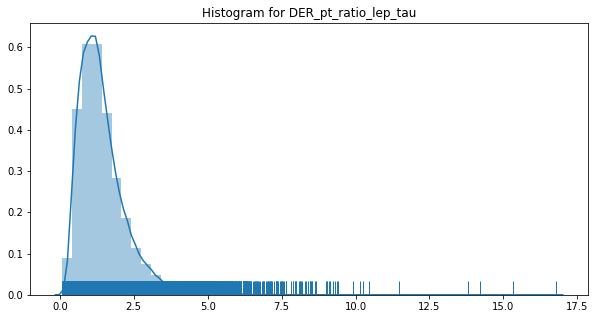

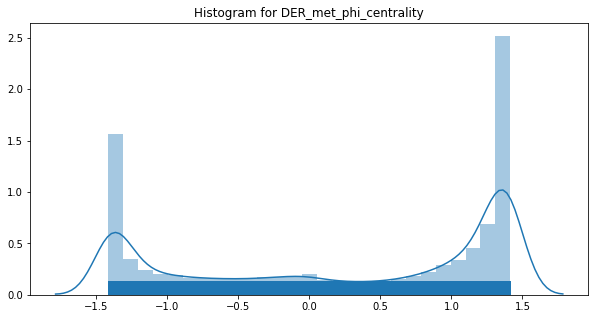

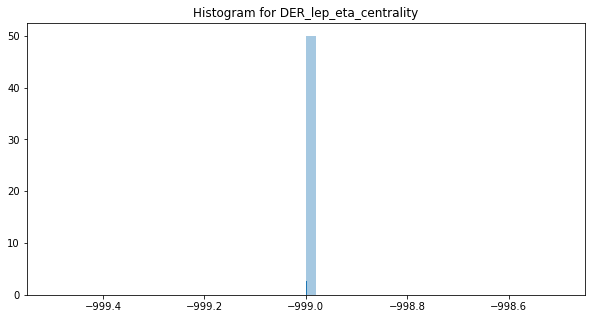

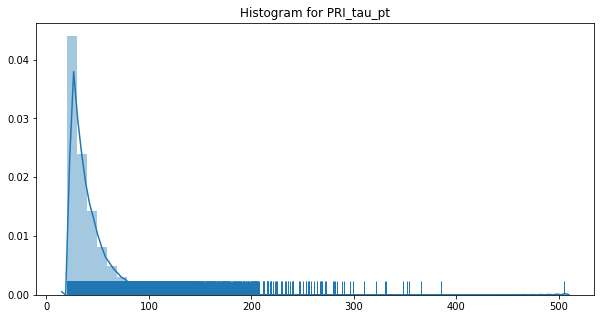

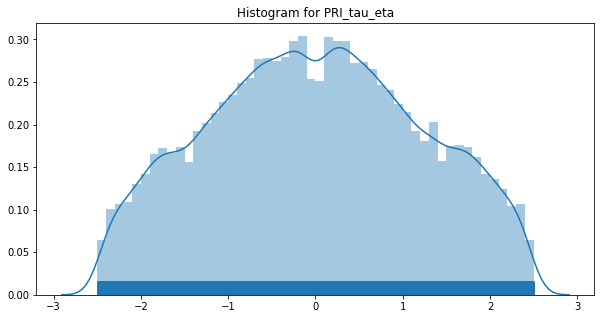

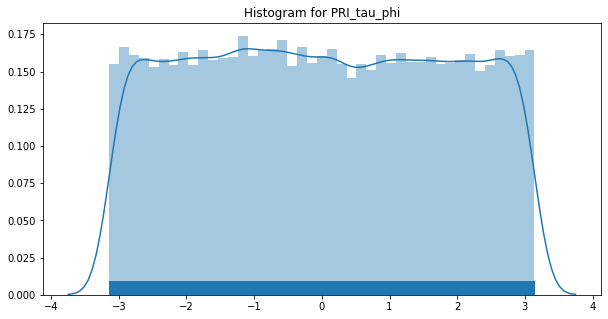

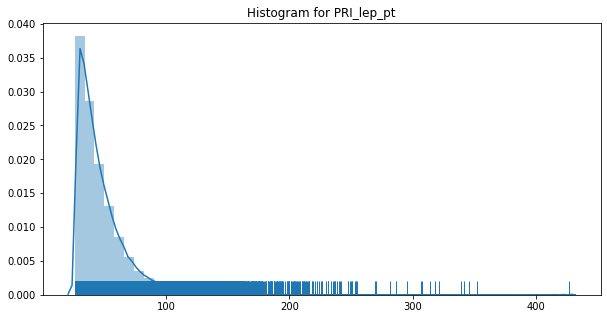

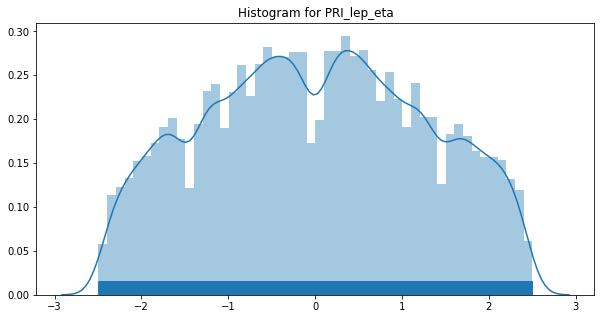

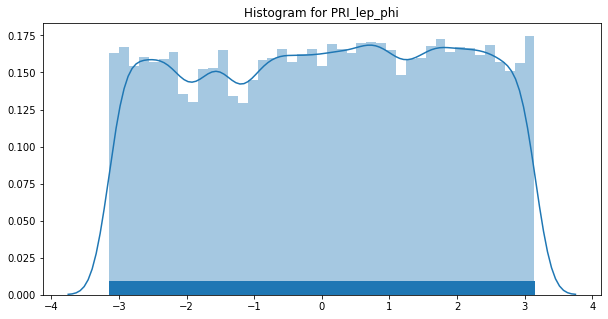

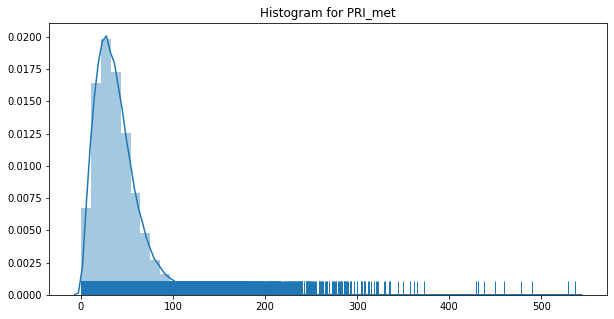

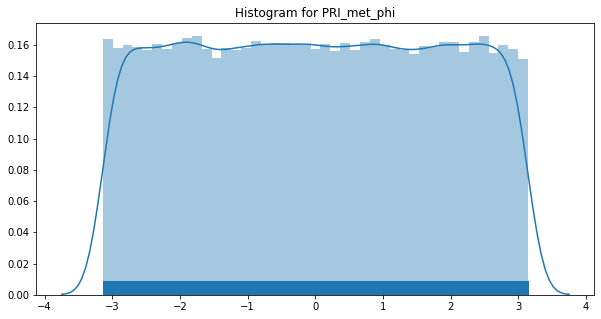

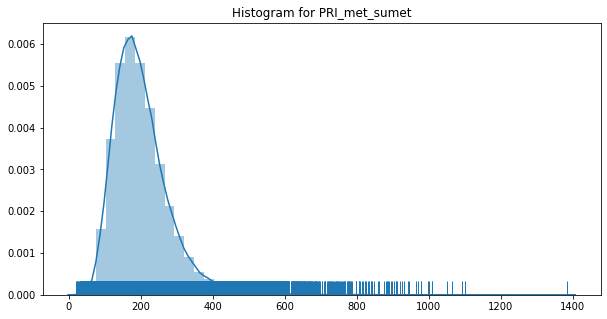

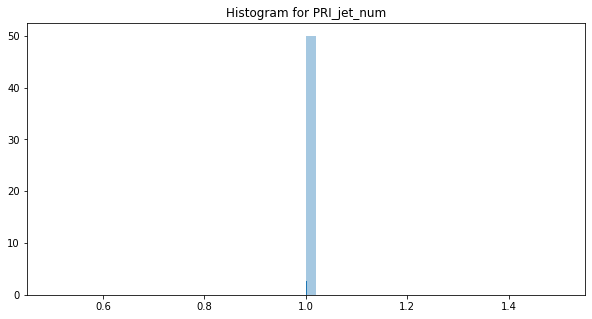

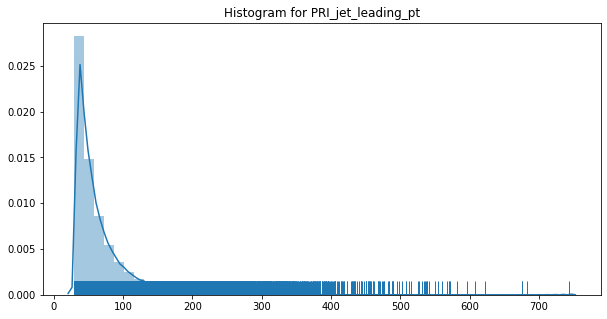

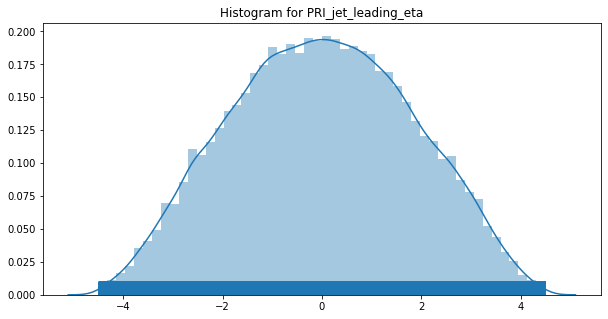

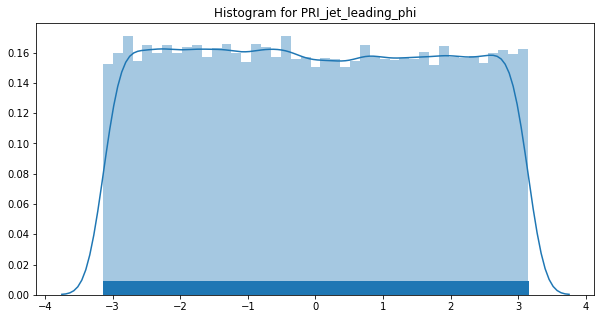

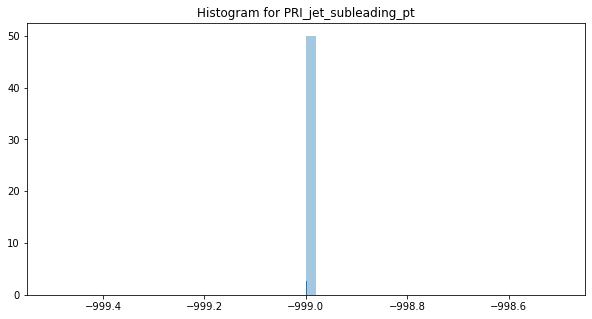

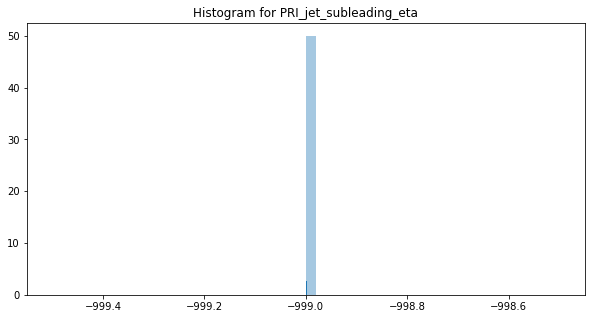

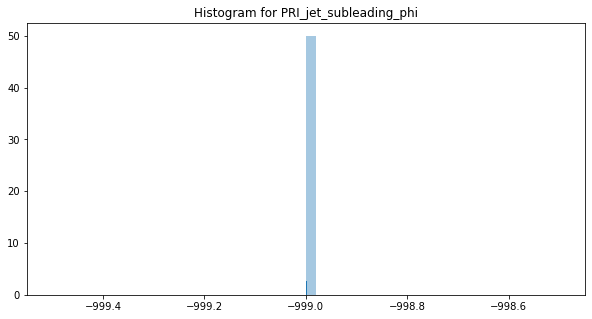

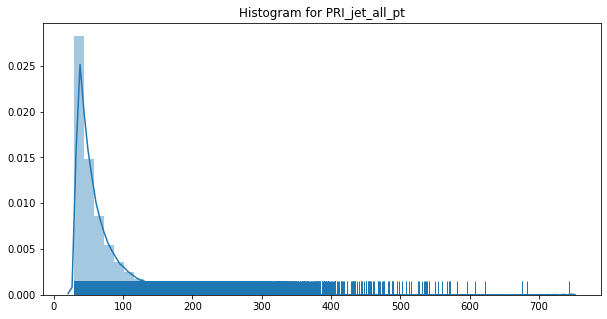

In [17]:
#let's plot the distribution of features of X_2
for i in range(30):
    histogram(i, X_2, dict_indexToName)

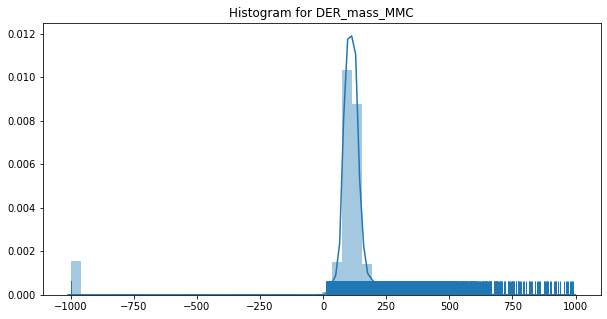

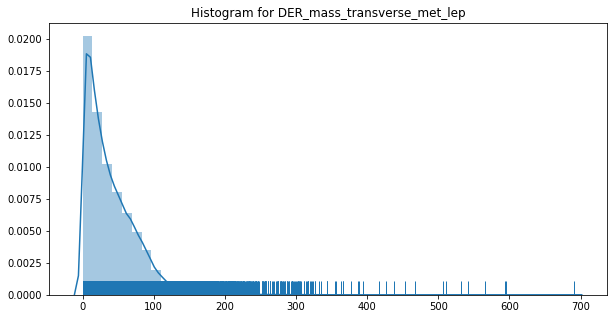

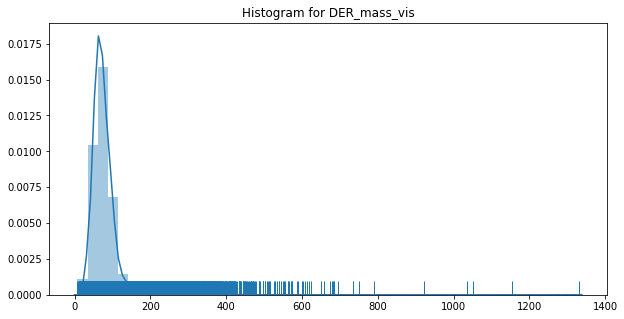

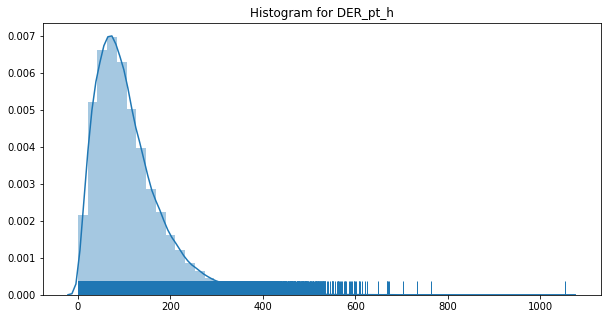

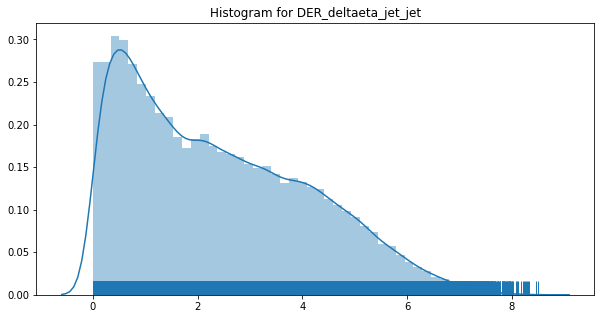

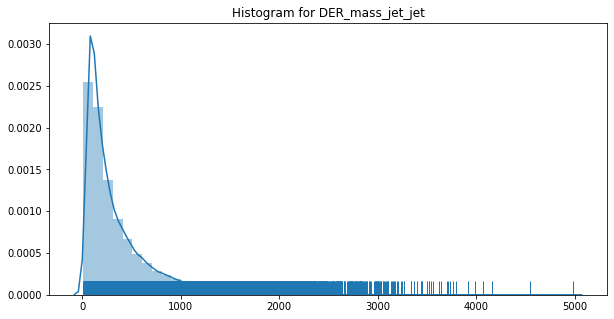

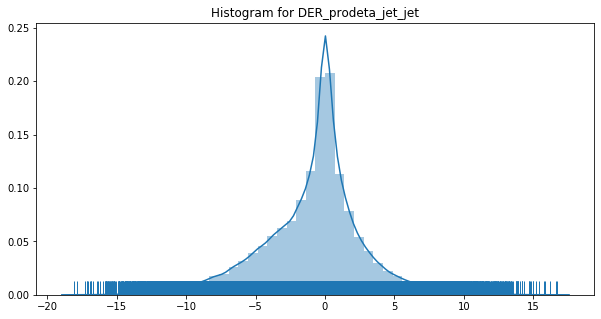

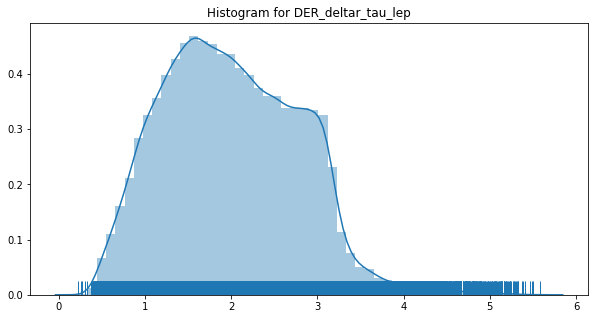

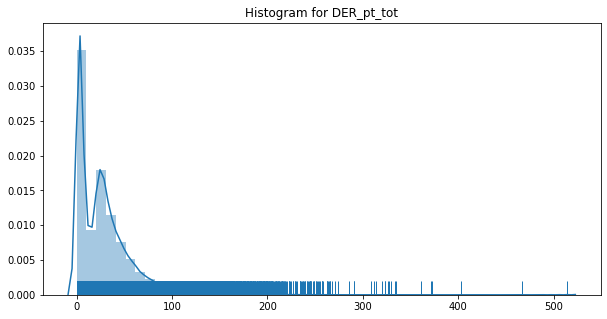

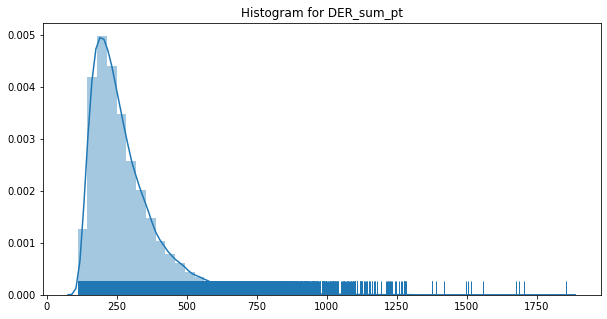

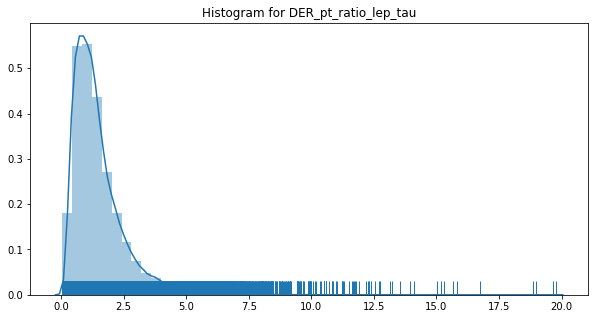

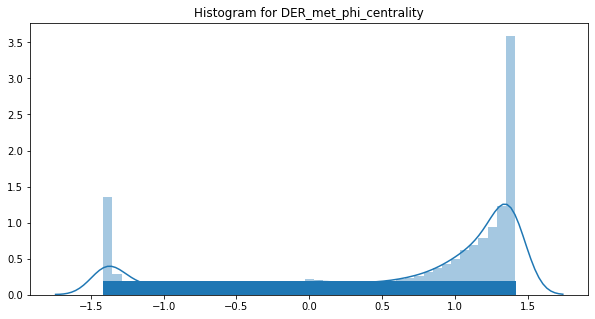

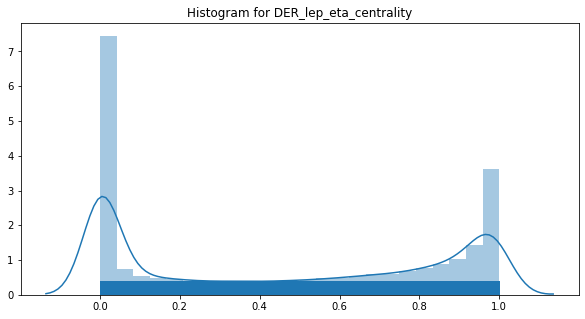

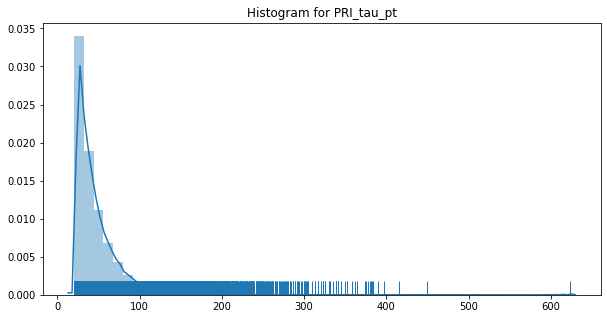

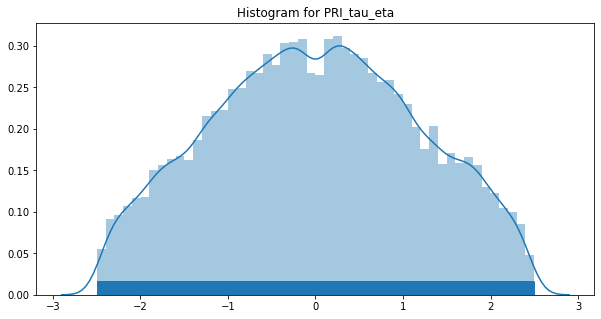

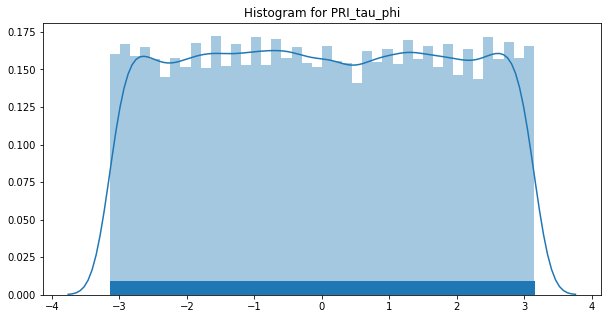

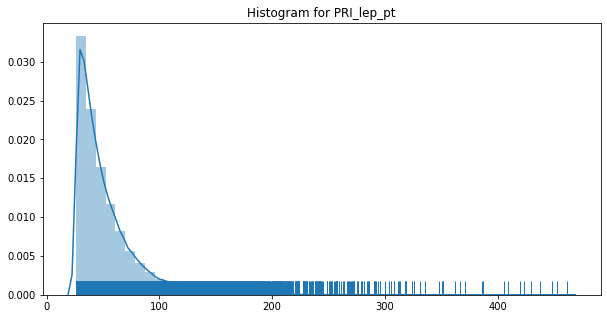

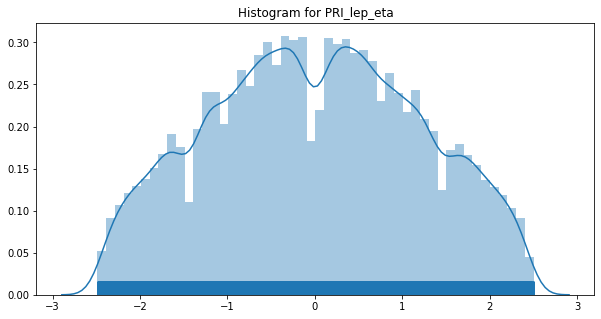

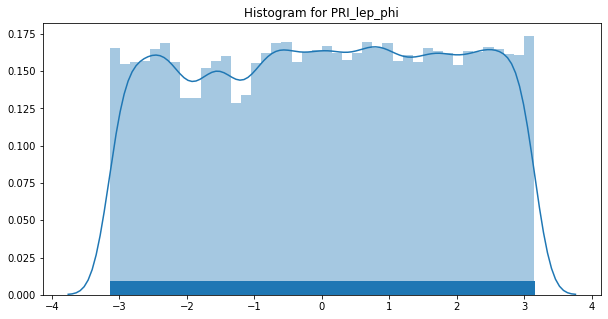

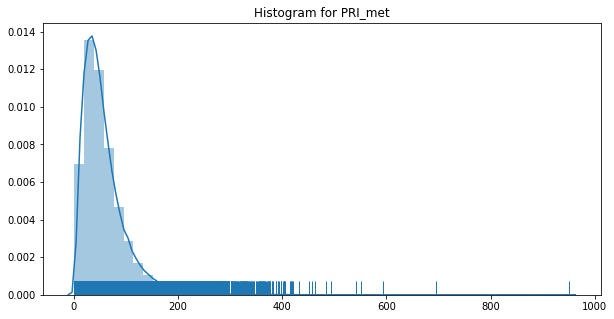

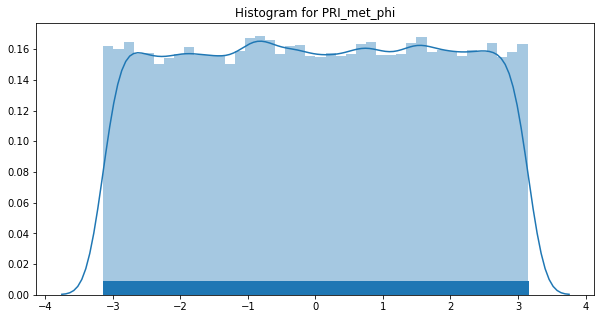

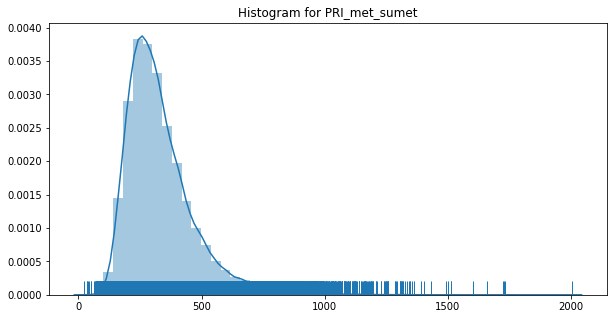

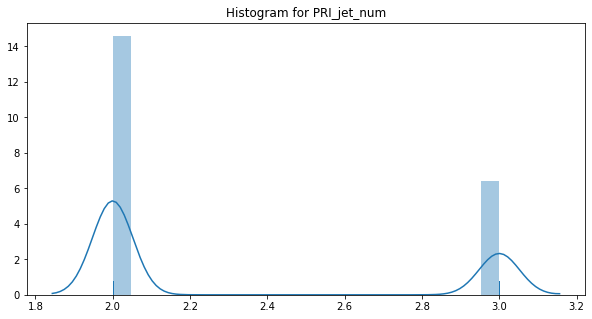

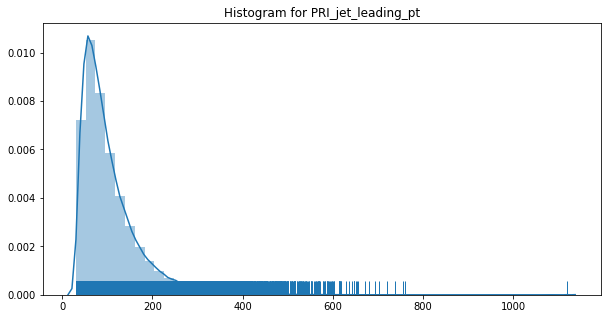

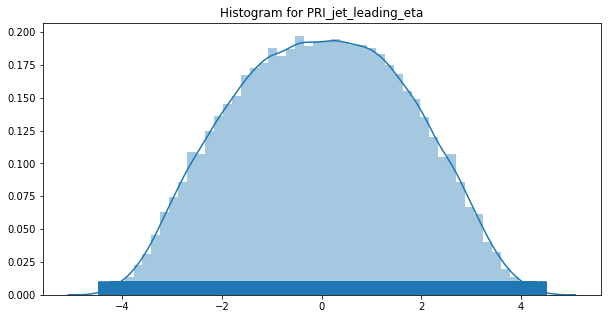

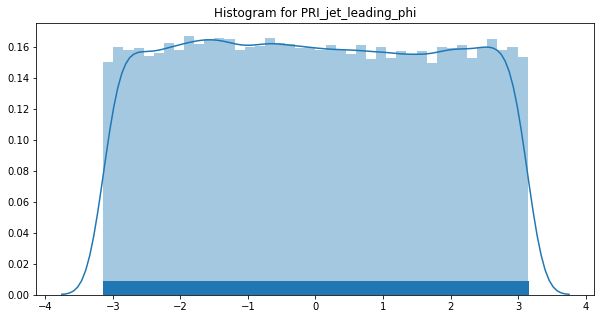

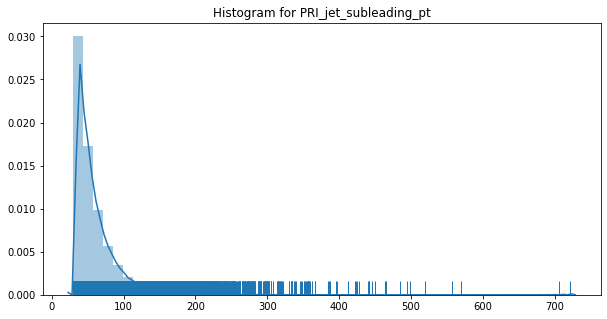

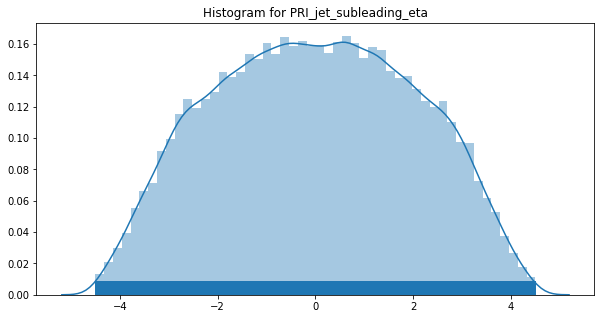

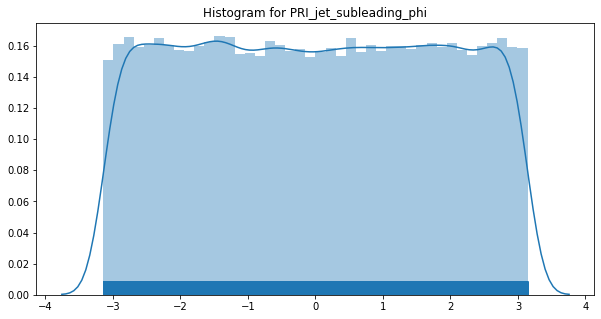

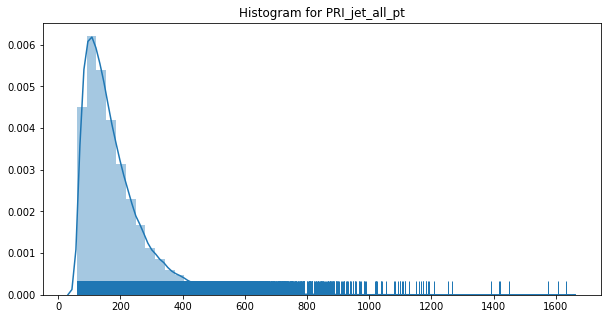

In [18]:
#let's plot the distribution of features of X_3
for i in range(30):
    histogram(i, X_3, dict_indexToName)

**We can drop the features that are constant in each subset.**

In [9]:
cols_1 = [4,5,6,12,22,23,24,25,26,27,28,29]
cols_2 = [4,5,6,12,22,26,27,28]
cols_3 = []
X_1 = np.delete(X_1, cols_1, axis=1)
X_2 = np.delete(X_2, cols_2, axis=1)
X_3 = np.delete(X_3, cols_3, axis=1)
col_names_1 = np.delete(col_names, cols_1)
col_names_2 = np.delete(col_names, cols_2)
col_names_3 = np.delete(col_names, cols_3)

In [10]:
print(X_1.shape, X_2.shape, X_3.shape)

(99913, 18) (77544, 22) (72543, 30)


## 3. Handling outliers
* We will first need to handle outliers as they can affect the computed mean later on but also because linear regression is highly sensitive to outliers.

In [11]:
undefined_value = -999.0

In [12]:
X_1 = replace_nan(X_1, undefined_value, mean=False)
X_2 = replace_nan(X_2, undefined_value, mean=False)
X_3 = replace_nan(X_3, undefined_value, mean=False)

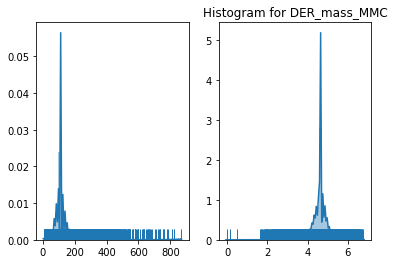

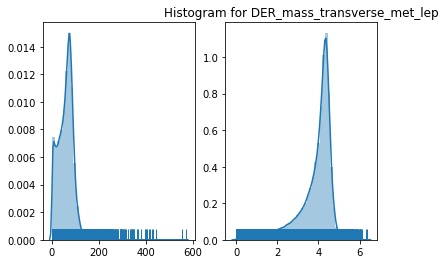

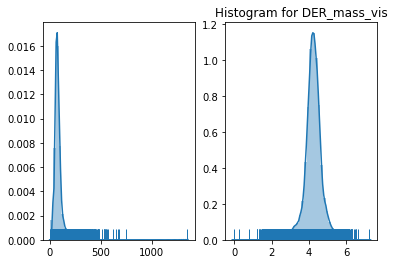

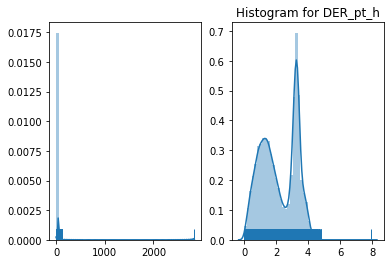

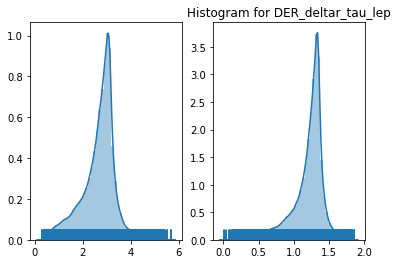

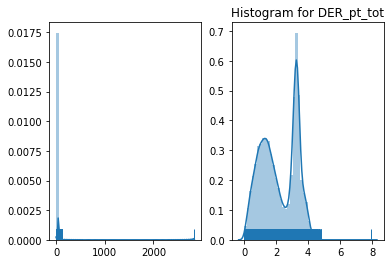

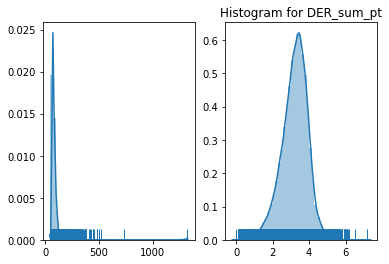

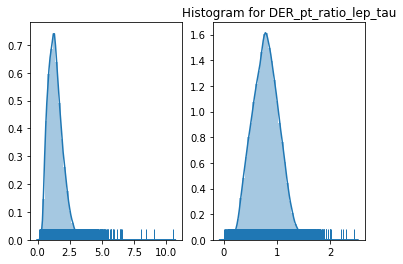

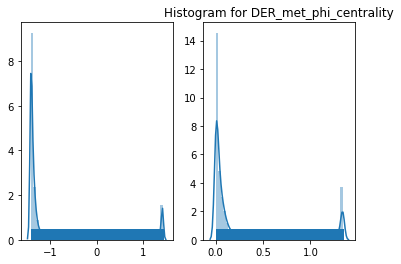

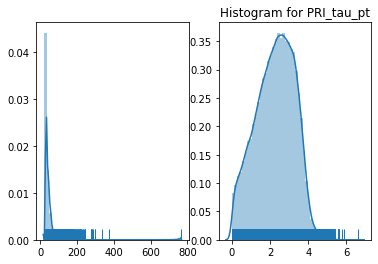

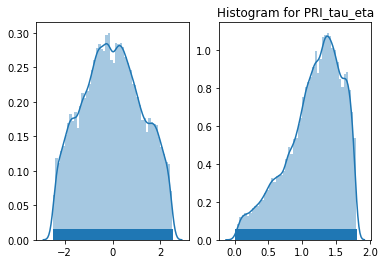

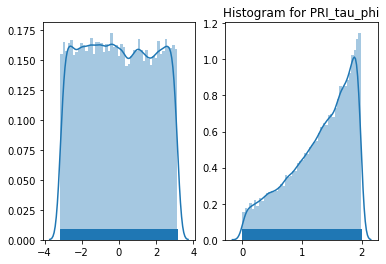

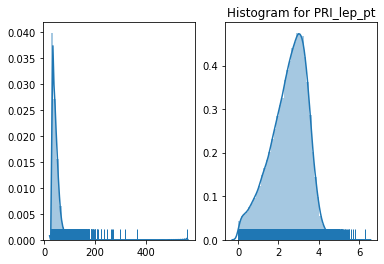

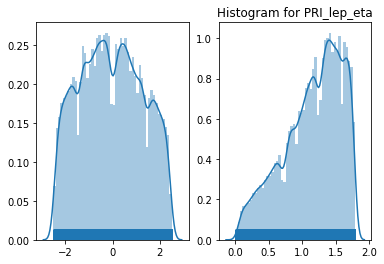

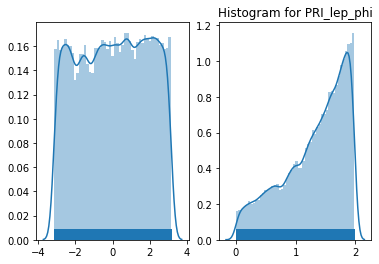

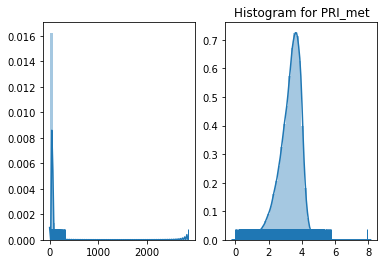

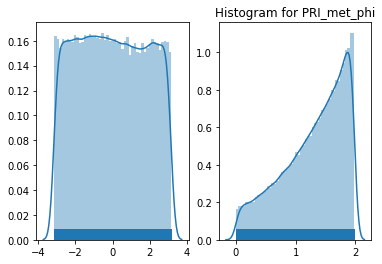

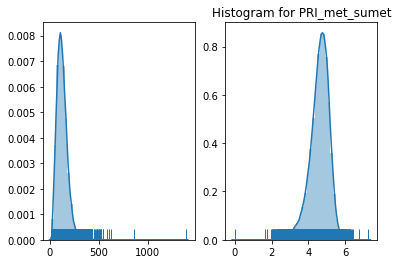

In [25]:
#let's plot the distribution of features of X_1 after replacing missing values
for i in range(X_1.shape[1]):
    log_histogram(i, X_1, col_names_1)

/Users/macbook/Desktop/ML/ML_2019/project1/helpers.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  count= sum([x>0 for x in y])


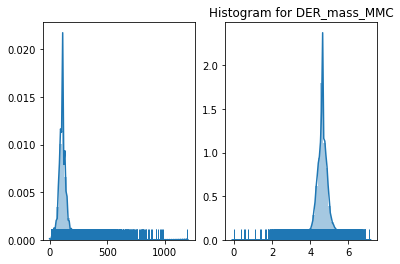

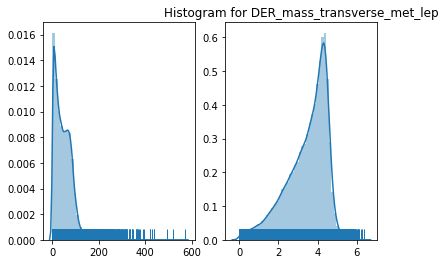

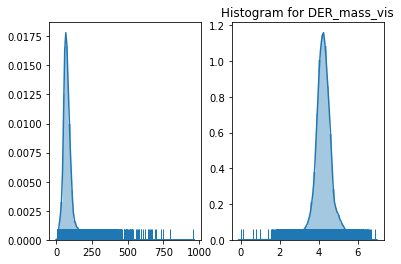

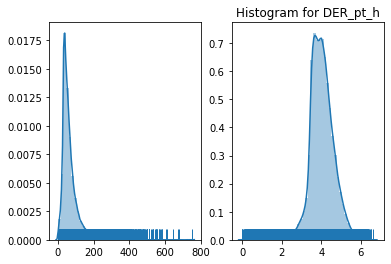

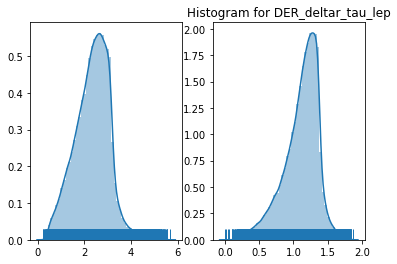

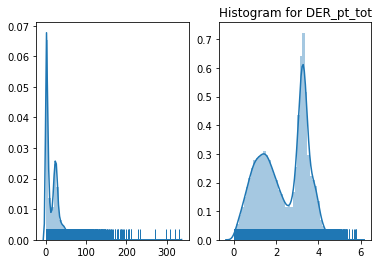

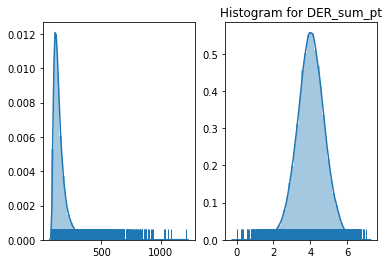

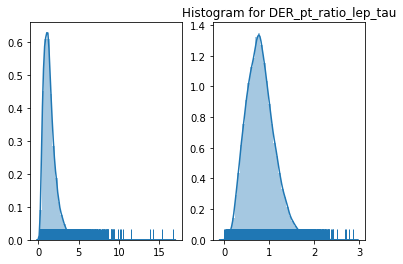

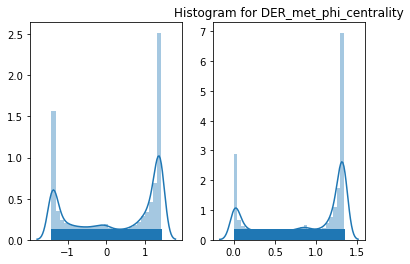

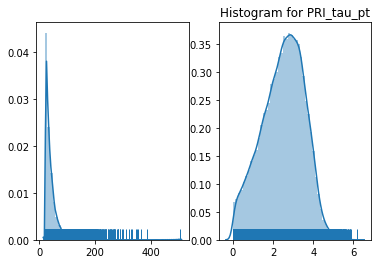

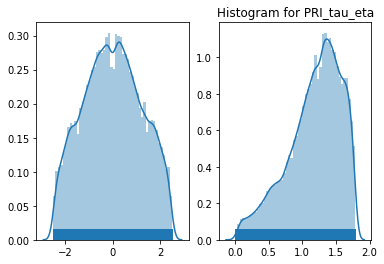

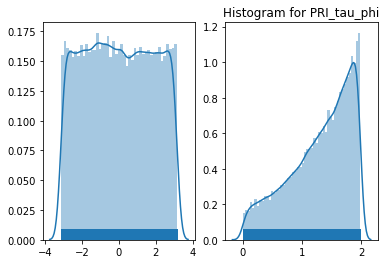

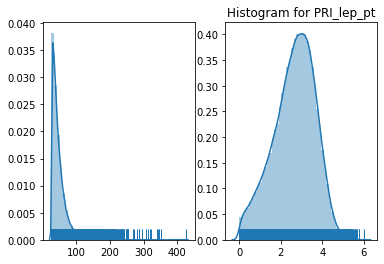

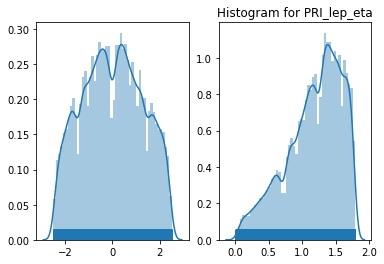

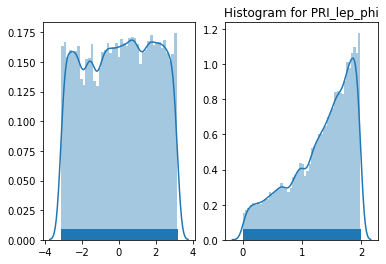

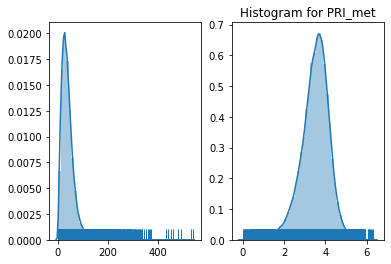

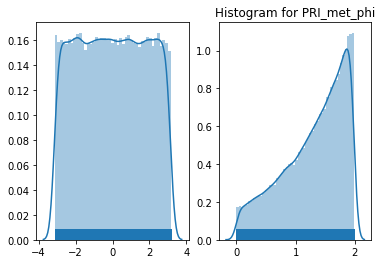

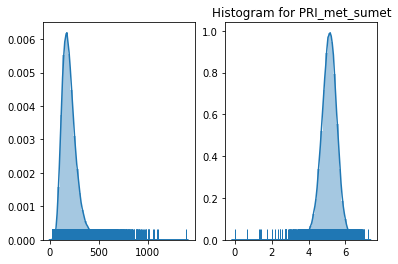

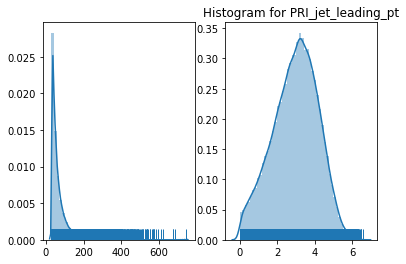

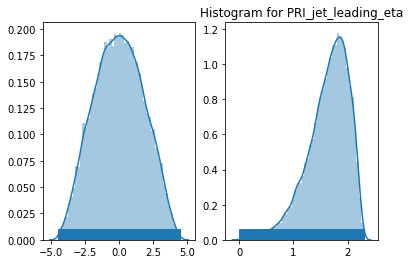

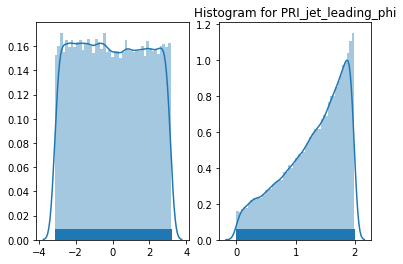

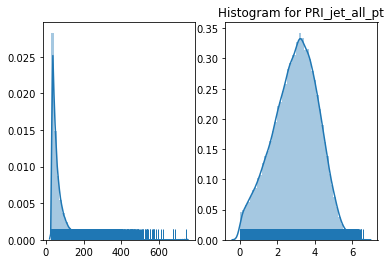

In [26]:
#let's plot the distribution of features of X_2 after replacing missing values
for i in range(X_2.shape[1]):
    log_histogram(i, X_2, col_names_2)

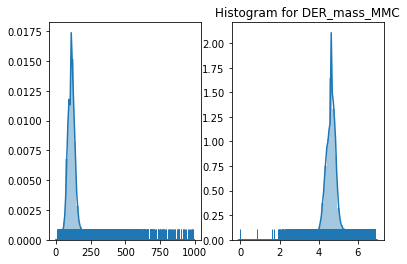

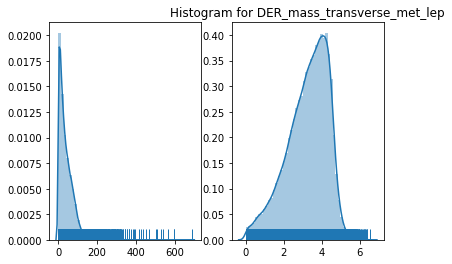

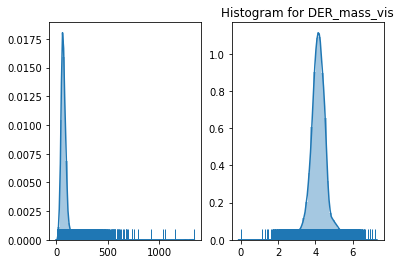

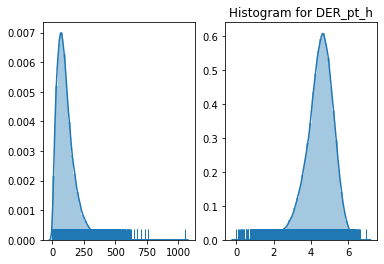

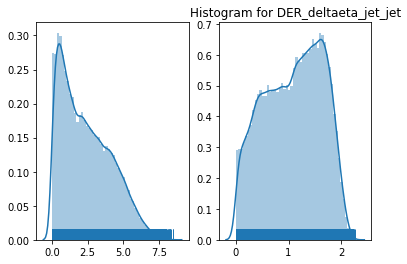

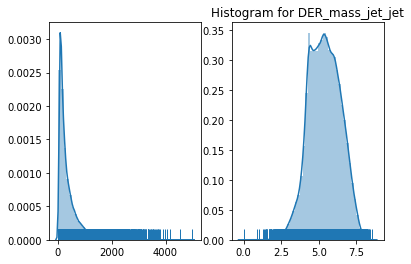

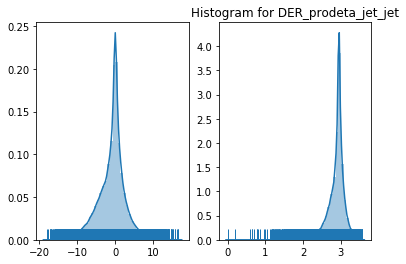

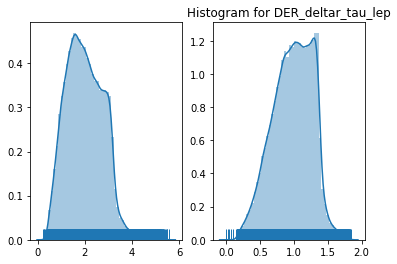

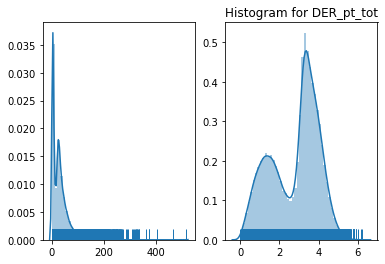

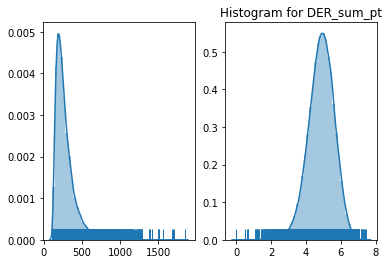

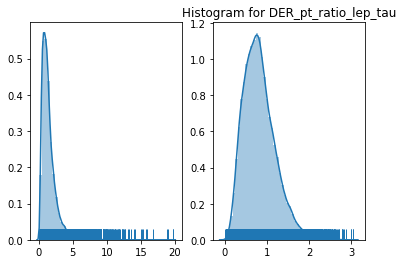

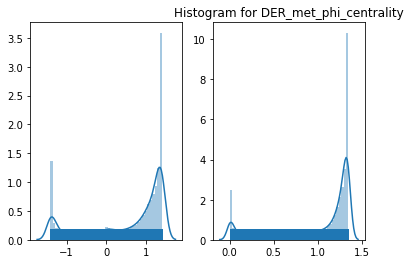

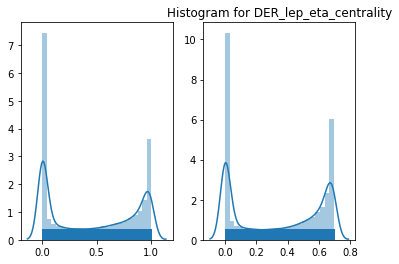

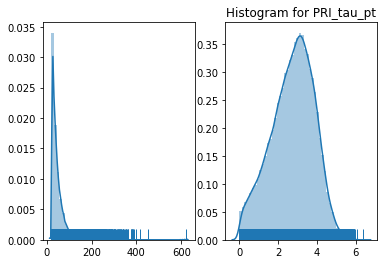

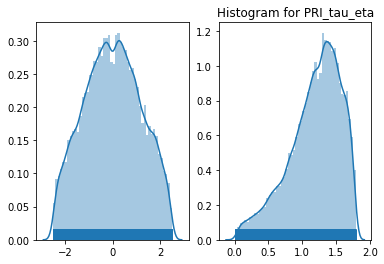

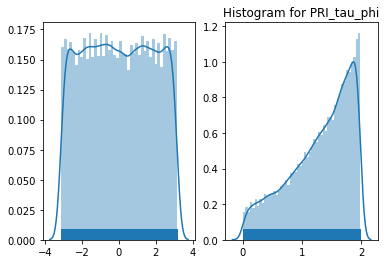

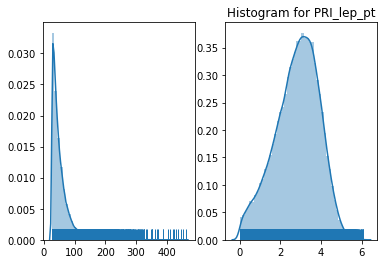

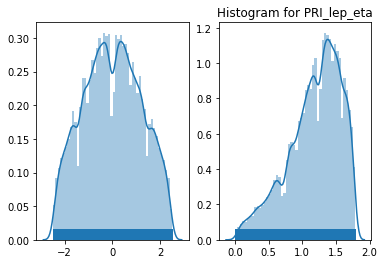

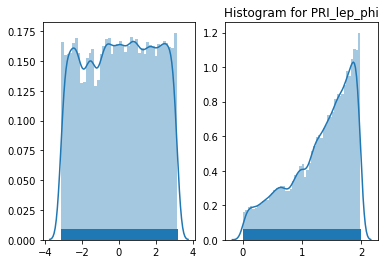

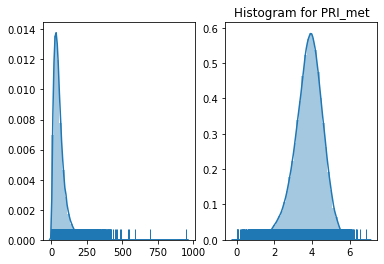

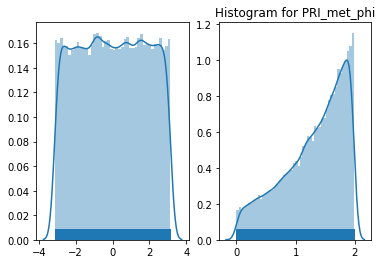

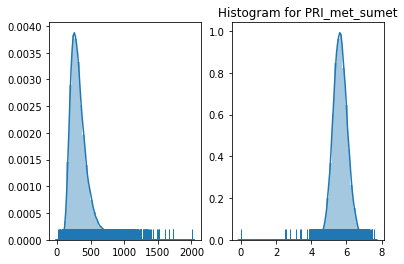

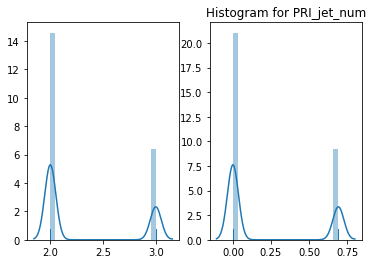

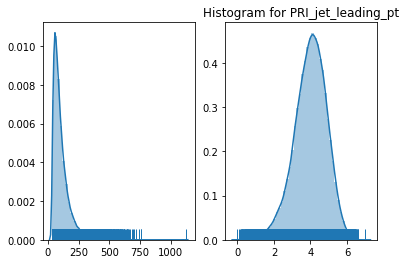

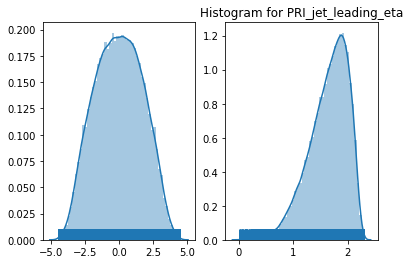

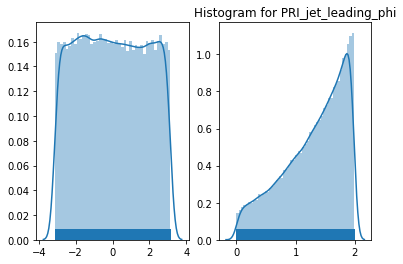

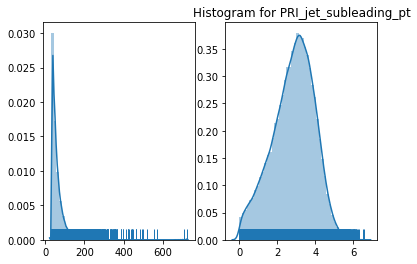

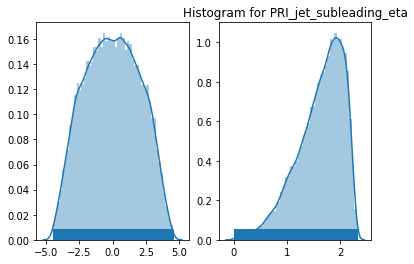

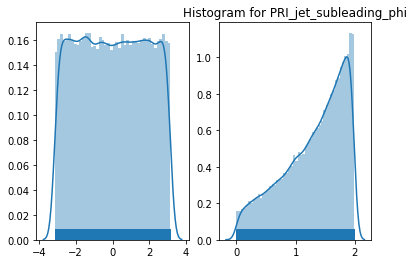

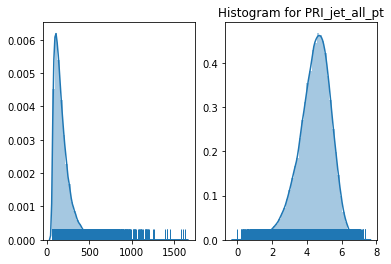

In [68]:
#let's plot the distribution of features of X_3 after replacing missing values
for i in range(X_3.shape[1]):
    log_histogram(i, X_3, col_names_3)

## 4. Data normalization/Standardization

## We use polynomial augmentation on our features

In [13]:
poly_1 = poly_expansion(X_1, 7)
poly_2 = poly_expansion(X_2, 7)
poly_3 = poly_expansion(X_3, 7)

In [14]:
print(poly_1.shape, poly_2.shape, poly_3.shape)

(99913, 126) (77544, 154) (72543, 210)


### For features which have right skewed distribution, we apply the log function. We use the following formula to be able to have only positive, strictly bigger than one values (condensed values between [0,1] will make our log transform left skewed instead):
$$X_n = log(X_n - min_{k=0}^{N}(X_n^k) + 1)$$ with $X_n$ being the feature n

In [15]:
#We see from the plotted histograms that some distributions are right skewed.
#We decided to take the log value of these features. 
#We notice that stacking the log of every value gives the best accuracy.

#idx_1 = [0, 1, 2, 3, 5, 6, 8, 11, 13, 15]
idx_1 = range(18)
X_1_logged = stack_log(X_1, idx_1)

#idx_2 = [0, 1, 2, 3, 5, 6, 9, 18, 20]
idx_2 = range(22)
X_2_logged = stack_log(X_2, idx_2)

#idx_3 = [0, 1, 2, 5, 8, 9, 10, 13, 19, 23, 26, 29]
idx_3 = range(30)
X_3_logged = stack_log(X_3, idx_3)

In [16]:
X_1_stack = stack_cols(poly_1,X_1_logged)
X_2_stack = stack_cols(poly_2,X_2_logged)
X_3_stack = stack_cols(poly_3,X_3_logged)

In [17]:
print(X_1_stack.shape, X_2_stack.shape, X_3_stack.shape)

(99913, 162) (77544, 198) (72543, 270)


### Data normalization/Standardization
- **Normalization (Min-Max Scalar)**: substract the minimum value of each observation, then divide by the difference between the mean and the max. This makes the data between 0 and 1. We will end up with smaller standard deviations, which can suppress the effect of outliers. It's a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian
- **Standardization**: subtracting the mean of each observation and then dividing by the standard deviation. We will end up with data of zero mean and std 1. This that data has a Gaussian distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution

[Source](https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)

In [18]:
X_1_std = standardize(X_1_stack)
X_2_std = standardize(X_2_stack)
X_3_std = standardize(X_3_stack)

In [19]:
print(X_1_std.shape, X_2_std.shape, X_3_std.shape)

(99913, 162) (77544, 198) (72543, 270)


# Training & Cross Validation

### Gradient descent

In [20]:
#subset 1
print('\t Subset 1 Gradient Descent')
x_train, y_train, x_validation, y_validation=split_data(X_1_std, y_1, ratio=0.8)
start_time = datetime.datetime.now()
weights, _= least_squares_GD(y_train, x_train, initial_w=np.ones(x_train.shape[1]), max_iters=800, gamma=0.1)
end_time = datetime.datetime.now()
# Print runtime
execution_time = (end_time - start_time).total_seconds()
print('Execution time={t:.3f} seconds'.format(t=execution_time))
find_threshold(x_validation, y_validation, weights)
print('\n\n')


#subset 2
print('\t Subset 2 Gradient Descent')
x_train, y_train, x_validation, y_validation=split_data(X_2_std, y_2, ratio=0.8)
start_time = datetime.datetime.now()
weights, _= least_squares_GD(y_train, x_train, initial_w=np.ones(x_train.shape[1]), max_iters=800, gamma=0.05)
end_time = datetime.datetime.now()
# Print runtime
execution_time = (end_time - start_time).total_seconds()
print('Execution time={t:.3f} seconds'.format(t=execution_time))
find_threshold(x_validation, y_validation, weights)
print('\n\n')

#subset 3
print('\t Subset 3 Gradient Descent')
x_train, y_train, x_validation, y_validation=split_data(X_3_std, y_3, ratio=0.8)
start_time = datetime.datetime.now()
weights, _= least_squares_GD(y_train, x_train, initial_w=np.ones(x_train.shape[1]), max_iters=800, gamma=0.05)
end_time = datetime.datetime.now()
# Print runtime
execution_time = (end_time - start_time).total_seconds()
print('Execution time={t:.3f} seconds'.format(t=execution_time))
find_threshold(x_validation, y_validation, weights)

	 Subset 1 Gradient Descent
Gradient Descent(0/799): loss=594.127635008178
Gradient Descent(200/799): loss=0.3575021525980172
Gradient Descent(400/799): loss=0.3428736696980432
Gradient Descent(600/799): loss=0.3366533489051487
Execution time=19.966 seconds



	 Subset 2 Gradient Descent
Gradient Descent(0/799): loss=1374.1070442252387
Gradient Descent(200/799): loss=0.3900413098804653
Gradient Descent(400/799): loss=0.3781155256085776
Gradient Descent(600/799): loss=0.37449368003812694
Execution time=19.795 seconds



	 Subset 3 Gradient Descent
Gradient Descent(0/799): loss=1844.9678561265798
Gradient Descent(200/799): loss=0.35761255109820717
Gradient Descent(400/799): loss=0.33476300488826616
Gradient Descent(600/799): loss=0.3286818279291353
Execution time=27.207 seconds


0.058558558558558516

### Stochastic Gradient Descent

In [21]:
#subset 1
print('\t Subset 1 Stochastic Gradient Descent')
x_train, y_train, x_validation, y_validation=split_data(X_1_std, y_1, ratio=0.8)
start_time = datetime.datetime.now()
weights, _= least_squares_SGD(y_train, x_train, initial_w=np.ones(x_train.shape[1]),\
                                                 max_iters=500, gamma=0.01)
end_time = datetime.datetime.now()
# Print runtime
execution_time = (end_time - start_time).total_seconds()
print('Execution time={t:.3f} seconds'.format(t=execution_time))
find_threshold(x_validation, y_validation, weights, print_result=True)
print('\n\n')


#subset 2
print('\t Subset 2 Stochastic Gradient Descent')
x_train, y_train, x_validation, y_validation=split_data(X_2_std, y_2, ratio=0.8)
start_time = datetime.datetime.now()
weights, _= least_squares_SGD(y_train, x_train, initial_w=np.ones(x_train.shape[1]),\
                                                 max_iters=500, gamma=0.01)
end_time = datetime.datetime.now()
# Print runtime
execution_time = (end_time - start_time).total_seconds()
print('Execution time={t:.3f} seconds'.format(t=execution_time))
find_threshold(x_validation, y_validation, weights, print_result=True)
print('\n\n')

#subset 3
print('\t Subset 3 Stochastic Gradient Descent')
x_train, y_train, x_validation, y_validation=split_data(X_3_std, y_3, ratio=0.8)
start_time = datetime.datetime.now()
weights, _= least_squares_SGD(y_train, x_train, initial_w=np.ones(x_train.shape[1]),\
                                                 max_iters=500, gamma=0.01)
end_time = datetime.datetime.now()
# Print runtime
execution_time = (end_time - start_time).total_seconds()
print('Execution time={t:.3f} seconds'.format(t=execution_time))
find_threshold(x_validation, y_validation, weights, print_result=True)

	 Subset 1 Stochastic Gradient Descent
Stochastic Gradient Descent(0/499): loss=594.127635008178
Stochastic Gradient Descent(200/499): loss=5.086376530633934
Stochastic Gradient Descent(400/499): loss=5.476302148829955
Execution time=54.122 seconds
best threshold =  0.493993993993994  with accuracy =  0.7245434075556667



	 Subset 2 Stochastic Gradient Descent
Stochastic Gradient Descent(0/499): loss=1374.1070442252387
Stochastic Gradient Descent(200/499): loss=68461.13787620235
Stochastic Gradient Descent(400/499): loss=9010.258960686942
Execution time=58.392 seconds
best threshold =  0.495995995995996  with accuracy =  0.49709864603481624



	 Subset 3 Stochastic Gradient Descent
Stochastic Gradient Descent(0/499): loss=1844.9678561265798
Stochastic Gradient Descent(200/499): loss=1573.7070560480124
Stochastic Gradient Descent(400/499): loss=142066577.24812227
Execution time=56.134 seconds
best threshold =  -0.5  with accuracy =  0.5227429359062715


-0.5

### Least squares

In [22]:
#subset 1
print('\t Subset 1 Least squares')
x_train, y_train, x_validation, y_validation=split_data(X_1_std, y_1, ratio=0.8)
start_time = datetime.datetime.now()
weights, _= least_squares(y_train, x_train)
end_time = datetime.datetime.now()
# Print runtime
execution_time = (end_time - start_time).total_seconds()
print('Execution time={t:.3f} seconds'.format(t=execution_time))
find_threshold(x_validation, y_validation, weights)
print('\n\n')

#subset 2
print('\t Subset 2 Least squares')
x_train, y_train, x_validation, y_validation=split_data(X_2_std, y_2, ratio=0.8)
start_time = datetime.datetime.now()
weights, _= least_squares(y_train, x_train)
end_time = datetime.datetime.now()
# Print runtime
execution_time = (end_time - start_time).total_seconds()
print('Execution time={t:.3f} seconds'.format(t=execution_time))
find_threshold(x_validation, y_validation, weights)
print('\n\n')

#subset 3
print('\t Subset 3 Least squares')
x_train, y_train, x_validation, y_validation=split_data(X_3_std, y_3, ratio=0.8)
start_time = datetime.datetime.now()
weights, _= least_squares(y_train, x_train)
end_time = datetime.datetime.now()
# Print runtime
execution_time = (end_time - start_time).total_seconds()
print('Execution time={t:.3f} seconds'.format(t=execution_time))
find_threshold(x_validation, y_validation, weights)
print('\n\n')

	 Subset 1 Least squares


C:\Users\lilia\OneDrive\Documents\ML_course\projects\projects_private\project1\implementations.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w,_,_,_ = np.linalg.lstsq(left,right)


Execution time=0.088 seconds



	 Subset 2 Least squares
Execution time=0.052 seconds



	 Subset 3 Least squares
Execution time=0.078 seconds





### Ridge regression cross-validated

	 Subset 1 Ridge regression
	 Subset 2 Ridge regression
	 Subset 3 Ridge regression


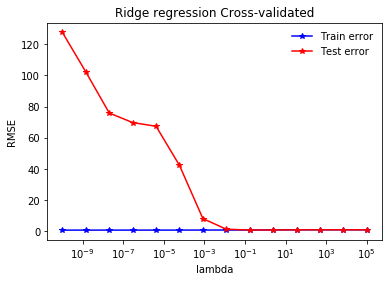

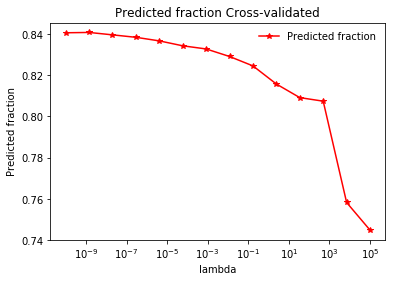

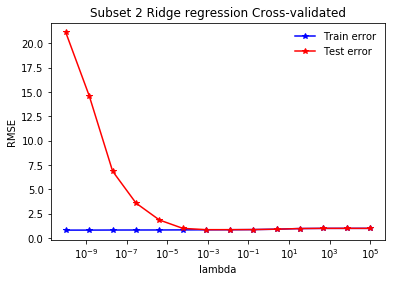

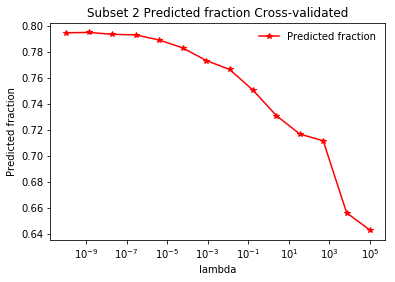

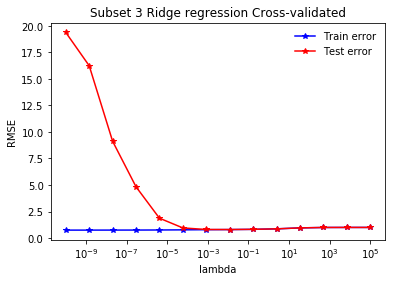

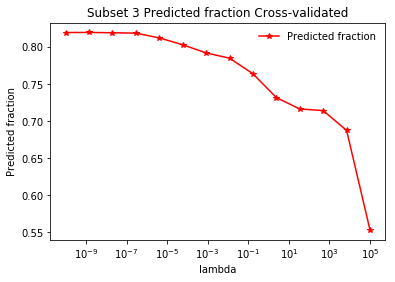

In [42]:
k_fold = 4
lambdas = np.logspace(-10, 5, 14)

#subset 1
print('\t Subset 1 Ridge regression')
X_subset = X_1_std
y_subset= y_1
rmse_tr, rmse_te, predicted_fractions = cross_validate(y_subset, X_subset, k_fold, lambda_range=lambdas)

#Visualize
plt.figure(0)
plt.semilogx(lambdas, rmse_tr, color='b', marker='*', label="Train error")
plt.semilogx(lambdas, rmse_te, color='r', marker='*', label="Test error")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("Ridge regression Cross-validated")
leg = plt.legend(loc=1, shadow=True)
leg.draw_frame(False)
plt.savefig("Subset_1_Ridge_Cross_val")

plt.figure(1)
plt.semilogx(lambdas, predicted_fractions, color='r', marker='*', label="Predicted fraction")
plt.xlabel("lambda")
plt.ylabel("Predicted fraction")
plt.title("Predicted fraction Cross-validated")
leg = plt.legend(loc=1, shadow=True)
leg.draw_frame(False)

#subset 2
print('\t Subset 2 Ridge regression')
X_subset = X_2_std
y_subset= y_2
rmse_tr, rmse_te, predicted_fractions = cross_validate(y_subset, X_subset, k_fold, lambda_range=lambdas)

#Visualize
plt.figure(3)
plt.semilogx(lambdas, rmse_tr, color='b', marker='*', label="Train error")
plt.semilogx(lambdas, rmse_te, color='r', marker='*', label="Test error")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("Subset 2 Ridge regression Cross-validated")
leg = plt.legend(loc=1, shadow=True)
leg.draw_frame(False)
plt.savefig("Subset_2_Ridge_Cross_val")

plt.figure(4)
plt.semilogx(lambdas, predicted_fractions, color='r', marker='*', label="Predicted fraction")
plt.xlabel("lambda")
plt.ylabel("Predicted fraction")
plt.title("Subset 2 Predicted fraction Cross-validated")
leg = plt.legend(loc=1, shadow=True)
leg.draw_frame(False)

#subset 3
print('\t Subset 3 Ridge regression')
X_subset = X_3_std
y_subset= y_3
rmse_tr, rmse_te, predicted_fractions = cross_validate(y_subset, X_subset, k_fold, lambda_range=lambdas)

#Visualize
plt.figure(5)
plt.semilogx(lambdas, rmse_tr, color='b', marker='*', label="Train error")
plt.semilogx(lambdas, rmse_te, color='r', marker='*', label="Test error")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("Subset 3 Ridge regression Cross-validated")
leg = plt.legend(loc=1, shadow=True)
leg.draw_frame(False)
plt.savefig("Subset_3_Ridge_Cross_val")

plt.figure(6)
plt.semilogx(lambdas, predicted_fractions, color='r', marker='*', label="Predicted fraction")
plt.xlabel("lambda")
plt.ylabel("Predicted fraction")
plt.title("Subset 3 Predicted fraction Cross-validated")
leg = plt.legend(loc=1, shadow=True)
leg.draw_frame(False)

* we choose $10^{-2}$ for subset 1
* we choose $10^{-5}$ for subset 2
* we choose $10^{-5}$ for subset 3

In [23]:
#lambda_ = 10**0

#subset 1
print('\t Subset 1 Penalized Logistic Regression')
x_train, y_train, x_validation, y_validation=split_data(X_1_std, y_1, ratio=0.8)
start_time = datetime.datetime.now()
weights, _= ridge_regression(y_train, x_train, lambda_= 10**-2)
end_time = datetime.datetime.now()
# Print runtime
execution_time = (end_time - start_time).total_seconds()
print('Execution time={t:.3f} seconds'.format(t=execution_time))
find_threshold(x_validation, y_validation, weights)
print('\n\n')

#subset 2
print('\t Subset 2 Penalized Logistic Regression')
x_train, y_train, x_validation, y_validation=split_data(X_2_std, y_2, ratio=0.8)
start_time = datetime.datetime.now()
weights, _= ridge_regression(y_train, x_train, lambda_= 10**-5)
end_time = datetime.datetime.now()
# Print runtime
execution_time = (end_time - start_time).total_seconds()
print('Execution time={t:.3f} seconds'.format(t=execution_time))
find_threshold(x_validation, y_validation, weights)
print('\n\n')

#subset 3
print('\t Subset 3 Penalized Logistic Regression')
x_train, y_train, x_validation, y_validation=split_data(X_3_std, y_3, ratio=0.8)
start_time = datetime.datetime.now()
weights, _= ridge_regression(y_train, x_train, lambda_= 10**-5)
end_time = datetime.datetime.now()
# Print runtime
execution_time = (end_time - start_time).total_seconds()
print('Execution time={t:.3f} seconds'.format(t=execution_time))
find_threshold(x_validation, y_validation, weights)
print('\n\n')

	 Subset 1 Penalized Logistic Regression
Execution time=0.052 seconds


C:\Users\lilia\OneDrive\Documents\ML_course\projects\projects_private\project1\implementations.py:85: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w,_,_,_ = np.linalg.lstsq(left,right)





	 Subset 2 Penalized Logistic Regression
Execution time=0.055 seconds



	 Subset 3 Penalized Logistic Regression
Execution time=0.107 seconds





## Implementing logistic regression

### Logistic regression

In [24]:
#subset 1
print('\t Subset 1 Logistic regression')
x_train, y_train, x_validation, y_validation=split_data(X_1_std, y_1, ratio=0.8)
weights,_ = logistic_regression(y_train, x_train,initial_w=np.ones(x_train.shape[1]),\
                                               max_iters = 1000, gamma = 0.1)
find_threshold(X_1_std,y_1, weights)
print('\n \n')

#subset 2
print('\t Subset 2 Logistic regression')
x_train, y_train, x_validation, y_validation=split_data(X_2_std, y_2, ratio=0.8)
weights,_ = logistic_regression(y_train, x_train,initial_w=np.ones(x_train.shape[1]),\
                                               max_iters = 1000, gamma = 0.1)
find_threshold(x_validation,y_validation, weights)
print('\n \n')

#subset 3
print('\t Subset 3 Logistic regression')
x_train, y_train, x_validation, y_validation=split_data(X_3_std, y_3, ratio=0.8)
weights,_ = logistic_regression(y_train, x_train,initial_w=np.ones(x_train.shape[1]),\
                                               max_iters = 1000, gamma = 0.1)
find_threshold(x_validation,y_validation, weights)

	 Subset 1 Logistic regression

 

	 Subset 2 Logistic regression

 

	 Subset 3 Logistic regression


-0.5

### Logistic regression penalized with lambda_

	 Subset 1 Penalized Logistic Regression 
Current iteration=0, loss=430549.13209205493
Current iteration=500, loss=-144343.70210347362
Current iteration=0, loss=421922.4039272162
Current iteration=500, loss=-141071.0335197759
Current iteration=0, loss=423994.1868506449
Current iteration=500, loss=-142307.18313411428
Current iteration=0, loss=425040.3298413714
Current iteration=500, loss=-140548.97389280063
Current iteration=0, loss=430549.13223785494
Current iteration=500, loss=-144340.93324238743
Current iteration=0, loss=421922.4040730162
Current iteration=500, loss=-141068.16197586892
Current iteration=0, loss=423994.1869964449
Current iteration=500, loss=-142303.74646768338
Current iteration=0, loss=425040.3299871714
Current iteration=500, loss=-140546.08362823993
Current iteration=0, loss=430549.1336958549
Current iteration=500, loss=-144313.24063209118
Current iteration=0, loss=421922.4055310162
Current iteration=500, loss=-141039.48223085338
Current iteration=0, loss=423994.1884

Current iteration=500, loss=-97804.14770431725
Current iteration=0, loss=294667.83381456975
Current iteration=500, loss=-97301.94896559426
Current iteration=0, loss=294681.66772423004
Current iteration=500, loss=-99706.33423436522
Current iteration=0, loss=303524.6738783121
Current iteration=500, loss=-95490.28589341415
Current iteration=0, loss=301762.35338635236
Current iteration=500, loss=-126808.16116594471
Current iteration=0, loss=294670.26381456974
Current iteration=500, loss=-126074.82601198321
Current iteration=0, loss=294684.09772423
Current iteration=500, loss=-126741.17590321659
Current iteration=0, loss=303527.1038783121
Current iteration=500, loss=-123588.39132325904
Current iteration=0, loss=301786.65338635235
Current iteration=500, loss=-69006.49342644578
Current iteration=0, loss=294694.56381456973
Current iteration=500, loss=-66429.92492351447
Current iteration=0, loss=294708.39772423
Current iteration=500, loss=-68494.18029145867
Current iteration=0, loss=303551.4038

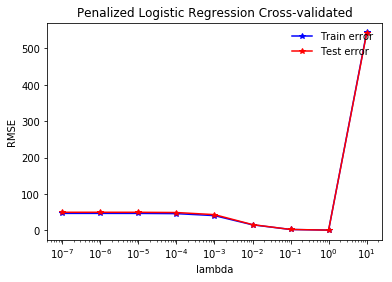

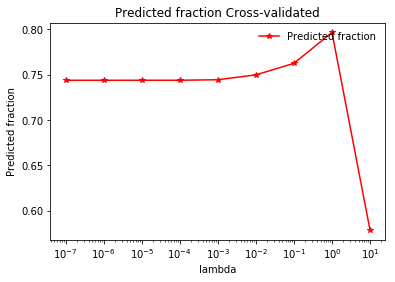

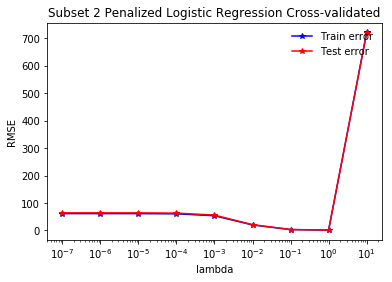

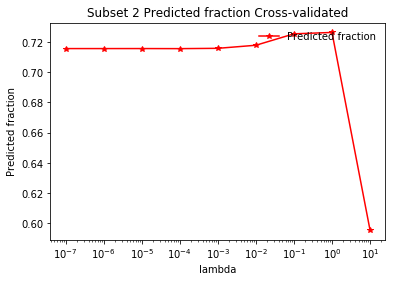

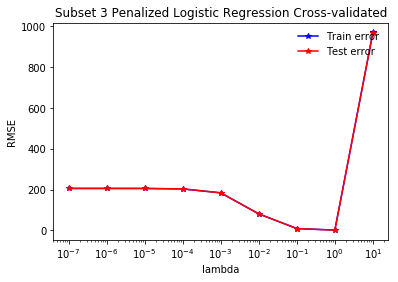

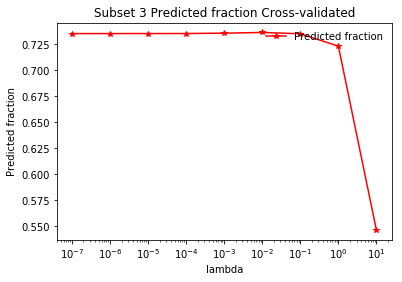

In [21]:
k_fold = 4
lambdas = np.logspace(-7, 1, 9)

#subset 1
print('\t Subset 1 Penalized Logistic Regression ')
X_subset = X_1_std
y_subset= y_1
rmse_tr, rmse_te, predicted_fractions = cross_validate(y_subset, X_subset, k_fold, lambda_range=lambdas, logistic = True)

#Visualize
plt.figure(0)
plt.semilogx(lambdas, rmse_tr, color='b', marker='*', label="Train error")
plt.semilogx(lambdas, rmse_te, color='r', marker='*', label="Test error")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("Penalized Logistic Regression Cross-validated")
leg = plt.legend(loc=1, shadow=True)
leg.draw_frame(False)

plt.figure(1)
plt.semilogx(lambdas, predicted_fractions, color='r', marker='*', label="Predicted fraction")
plt.xlabel("lambda")
plt.ylabel("Predicted fraction")
plt.title("Predicted fraction Cross-validated")
leg = plt.legend(loc=1, shadow=True)
leg.draw_frame(False)

#subset 2
print('\t Subset 2 Penalized Logistic Regression ')
X_subset = X_2_std
y_subset= y_2
rmse_tr, rmse_te, predicted_fractions = cross_validate(y_subset, X_subset, k_fold, lambda_range=lambdas, logistic = True)

#Visualize
plt.figure(3)
plt.semilogx(lambdas, rmse_tr, color='b', marker='*', label="Train error")
plt.semilogx(lambdas, rmse_te, color='r', marker='*', label="Test error")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("Subset 2 Penalized Logistic Regression Cross-validated")
leg = plt.legend(loc=1, shadow=True)
leg.draw_frame(False)

plt.figure(4)
plt.semilogx(lambdas, predicted_fractions, color='r', marker='*', label="Predicted fraction")
plt.xlabel("lambda")
plt.ylabel("Predicted fraction")
plt.title("Subset 2 Predicted fraction Cross-validated")
leg = plt.legend(loc=1, shadow=True)
leg.draw_frame(False)

#subset 3
print('\t Subset 3 Penalized Logistic Regression ')
X_subset = X_3_std
y_subset= y_3
rmse_tr, rmse_te, predicted_fractions = cross_validate(y_subset, X_subset, k_fold, lambda_range=lambdas, logistic = True)

#Visualize
plt.figure(5)
plt.semilogx(lambdas, rmse_tr, color='b', marker='*', label="Train error")
plt.semilogx(lambdas, rmse_te, color='r', marker='*', label="Test error")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("Subset 3 Penalized Logistic Regression Cross-validated")
leg = plt.legend(loc=1, shadow=True)
leg.draw_frame(False)

plt.figure(6)
plt.semilogx(lambdas, predicted_fractions, color='r', marker='*', label="Predicted fraction")
plt.xlabel("lambda")
plt.ylabel("Predicted fraction")
plt.title("Subset 3 Predicted fraction Cross-validated")
leg = plt.legend(loc=1, shadow=True)
leg.draw_frame(False)

In [25]:
#lambda_ = 10**0

#subset 1
print('\t Subset 1 Penalized Logistic Regression')
x_train, y_train, x_validation, y_validation=split_data(X_1_std, y_1, ratio=0.8)
start_time = datetime.datetime.now()
weights, _= reg_logistic_regression(y_train, x_train, lambda_= 10**0,\
                                    initial_w=np.ones(x_train.shape[1]), max_iters=100, gamma=0.1)
end_time = datetime.datetime.now()
# Print runtime
execution_time = (end_time - start_time).total_seconds()
print('Execution time={t:.3f} seconds'.format(t=execution_time))
find_threshold(x_validation, y_validation, weights)
print('\n\n')

#subset 2
print('\t Subset 2 Penalized Logistic Regression')
x_train, y_train, x_validation, y_validation=split_data(X_2_std, y_2, ratio=0.8)
start_time = datetime.datetime.now()
weights, _= reg_logistic_regression(y_train, x_train, lambda_= 10**0,\
                                    initial_w=np.ones(x_train.shape[1]), max_iters=100, gamma=0.1)
end_time = datetime.datetime.now()
# Print runtime
execution_time = (end_time - start_time).total_seconds()
print('Execution time={t:.3f} seconds'.format(t=execution_time))
find_threshold(x_validation, y_validation, weights)
print('\n\n')

#subset 3
print('\t Subset 3 Penalized Logistic Regression')
x_train, y_train, x_validation, y_validation=split_data(X_3_std, y_3, ratio=0.8)
start_time = datetime.datetime.now()
weights, _= reg_logistic_regression(y_train, x_train, lambda_= 10**-1,\
                                    initial_w=np.ones(x_train.shape[1]), max_iters=100, gamma=0.1)
end_time = datetime.datetime.now()
# Print runtime
execution_time = (end_time - start_time).total_seconds()
print('Execution time={t:.3f} seconds'.format(t=execution_time))
find_threshold(x_validation, y_validation, weights)
print('\n\n')

	 Subset 1 Penalized Logistic Regression
Current iteration=0, loss=456937.65362331143
Execution time=2.817 seconds



	 Subset 2 Penalized Logistic Regression
Current iteration=0, loss=242143.78698259097
Execution time=2.545 seconds



	 Subset 3 Penalized Logistic Regression
Current iteration=0, loss=320645.3798557663
Execution time=3.092 seconds





## Load the test set & generate output

In [67]:
#loading the test set
path_dataset = "data/test.csv"
y_test, test_data, test_ids = load_csv_data(path_dataset)

In [68]:
#Processing the test_set the same way we did for training_set
(keys_1, X_1, y_1),(keys_2, X_2, y_2),(keys_3, X_3, y_3) = process_data(y_test, test_data, test_ids)

In [70]:
#Compute the predictions from the most accurate models
pred_1 = X_1 @ weights_1
pred_2 = X_2 @ weights_2
pred_3 = X_3 @ weights_3

#Computing the labels according to the predictions and the chosen thresholds
y_1 = [1 if x > threshold_1 else -1 for x in pred_1]
y_2 = [1 if x > threshold_2 else -1 for x in pred_2]
y_3 = [1 if x > threshold_3 else -1 for x in pred_3]

In [71]:
#put back the three subsets into one numpy array with the correct keys ordering

shape_1 = (len(keys_1), 2)
test_1 = np.zeros(shape_1)
test_1[:,0]=keys_1
test_1[:,1]=y_1

shape_2 = (len(keys_2), 2)
test_2 = np.zeros(shape_2)
test_2[:,0]=keys_2
test_2[:,1]=y_2

shape_3 = (len(keys_3), 2)
test_3 = np.zeros(shape_3)
test_3[:,0]=keys_3
test_3[:,1]=y_3

test = np.concatenate((test_1,test_2,test_3), axis=0)

In [73]:
create_csv_submission(test[:,0],test[:,1],"output1.csv")